In [ ]:
import geopandas as gpd
# prompt: cargar csv que está en drive en la carpeta tesis
from google.colab import drive
drive.mount('/content/drive')

# Ruta al archivo shapefile
shp_path =  '/content/drive/MyDrive/Tesis/Datos/v_camineria_nacional.shp'
roads = gpd.read_file(shp_path)

# Ver tipos y estructura
print(roads.columns)
print(roads.crs, roads.head())

# Filter the GeoDataFrame for route 8
route_8 = roads[roads['numero'] == 8]

# Display the geometry (coordinates) of route 8
print("Coordinates of Route 8:")
display(route_8.geometry)

Mounted at /content/drive
Index(['gid', 'codigo', 'numero', 'nombre', 'depto', 'jurisdicci', 'categoria',
       'sentido', 'carriles', 'calzada', 'fuente', 'observacio', 'nat_juridi',
       'geometry'],
      dtype='object')
EPSG:4326        gid     codigo  numero                        nombre depto  \
0  3344250  UY0110000    11.0         José Batlle y Ordoñez  UYCA   
1   349731  UY0110000    11.0         José Batlle y Ordoñez  UYCA   
2   292738  UY0270000    27.0                   Mario Heber  UYRV   
3   305834  UY0050000     5.0  Brig. Gral. Fructuoso Rivera  UYMO   
4  3343102   UYTA0284     NaN                          None  UYTA   

    jurisdicci                categoria  \
0     NACIONAL   CORREDOR INTERNACIONAL   
1     NACIONAL   CORREDOR INTERNACIONAL   
2     NACIONAL          RUTA SECUNDARIA   
3     NACIONAL   CORREDOR INTERNACIONAL   
4  SIN DEFINIR  CAMINERÍA DEPARTAMENTAL   

                                             sentido carriles        calzada  \
0  EL SEN

,geometry
5,"LINESTRING (-55.97549 -34.73424, -55.97567 -34..."
14,"LINESTRING (-55.56265 -34.64976, -55.56254 -34..."
15,"LINESTRING (-55.87505 -34.69737, -55.87352 -34..."
17,"LINESTRING (-55.96269 -34.72595, -55.96311 -34..."
18,"LINESTRING (-55.84912 -34.69312, -55.84824 -34..."
...,...
38826,"LINESTRING (-54.75422 -33.74464, -54.75411 -33..."
38853,"LINESTRING (-54.65847 -33.67037, -54.65732 -33..."
39897,"LINESTRING (-54.17077 -32.36289, -54.17045 -32..."
39898,"LINESTRING (-54.17045 -32.3629, -54.16942 -32...."


In [ ]:
csv_path =  '/content/drive/MyDrive/Tesis/Datos/Ruta8/remaining_route8_points.csv'
remaining_points = gpd.read_file(csv_path)
remaining_points.head()

,index,latitude,longitude
0,1,-34.734240819732456,-55.97548670651552
1,2,-34.7342490239945,-55.97567271040511
2,3,-34.64975647167261,-55.5626487299544
3,4,-34.64973612155217,-55.56222744021392
4,5,-34.649554126089896,-55.56210456722899


In [ ]:
paradas =  '/content/drive/MyDrive/Tesis/Datos/Ruta8/paradas_reales_con_coords.csv'
paradas = gpd.read_file(paradas)
paradas.head()

,image_path,image_name,index,lat,lon
0,/content/drive/MyDrive/Tesis/Datos/Ruta8/parad...,ruta8_pt_11276_z20.png,11276,-34.41447309963236,-55.36602791343036
1,/content/drive/MyDrive/Tesis/Datos/Ruta8/parad...,ruta8_pt_11279_z20.png,11279,-34.66305571092745,-55.61939256166202
2,/content/drive/MyDrive/Tesis/Datos/Ruta8/parad...,ruta8_pt_11286_z20.png,11286,-34.66276677366192,-55.61598647611578
3,/content/drive/MyDrive/Tesis/Datos/Ruta8/parad...,ruta8_pt_11287_z20.png,11287,-34.662706571603024,-55.615543322180166
4,/content/drive/MyDrive/Tesis/Datos/Ruta8/parad...,ruta8_pt_11603_z20.png,11603,-33.918241876116525,-54.77572280142126


In [ ]:
import geopandas as gpd
from shapely.geometry import Point

gdf = gpd.GeoDataFrame(
    paradas.copy(),
    geometry=gpd.points_from_xy(paradas['lon'], paradas['lat']),
    crs="EPSG:4326"  # lat/lon WGS84
)

In [ ]:
gdf

,image_path,image_name,index,lat,lon,geometry
0,/content/drive/MyDrive/Tesis/Datos/Ruta8/parad...,ruta8_pt_11276_z20.png,11276,-34.41447309963236,-55.36602791343036,POINT (-55.36603 -34.41447)
1,/content/drive/MyDrive/Tesis/Datos/Ruta8/parad...,ruta8_pt_11279_z20.png,11279,-34.66305571092745,-55.61939256166202,POINT (-55.61939 -34.66306)
2,/content/drive/MyDrive/Tesis/Datos/Ruta8/parad...,ruta8_pt_11286_z20.png,11286,-34.66276677366192,-55.61598647611578,POINT (-55.61599 -34.66277)
3,/content/drive/MyDrive/Tesis/Datos/Ruta8/parad...,ruta8_pt_11287_z20.png,11287,-34.662706571603024,-55.615543322180166,POINT (-55.61554 -34.66271)
4,/content/drive/MyDrive/Tesis/Datos/Ruta8/parad...,ruta8_pt_11603_z20.png,11603,-33.918241876116525,-54.77572280142126,POINT (-54.77572 -33.91824)
...,...,...,...,...,...,...
280,/content/drive/MyDrive/Tesis/Datos/Ruta8/parad...,ruta8_00027_z20.png,27,-34.69467233995302,-55.86622418676908,POINT (-55.86622 -34.69467)
281,/content/drive/MyDrive/Tesis/Datos/Ruta8/parad...,ruta8_00036_z20.png,36,-34.69393883295152,-55.862282633920415,POINT (-55.86228 -34.69394)
282,/content/drive/MyDrive/Tesis/Datos/Ruta8/parad...,ruta8_pt_00052_z20.png,52,-34.6933102104595,-55.85514354752223,POINT (-55.85514 -34.69331)
283,/content/drive/MyDrive/Tesis/Datos/Ruta8/parad...,ruta8_pt_00109_z20.png,109,-33.74374923882327,-54.753946849718176,POINT (-54.75395 -33.74375)


Text(76.79559169825573, 0.5, 'Lat')

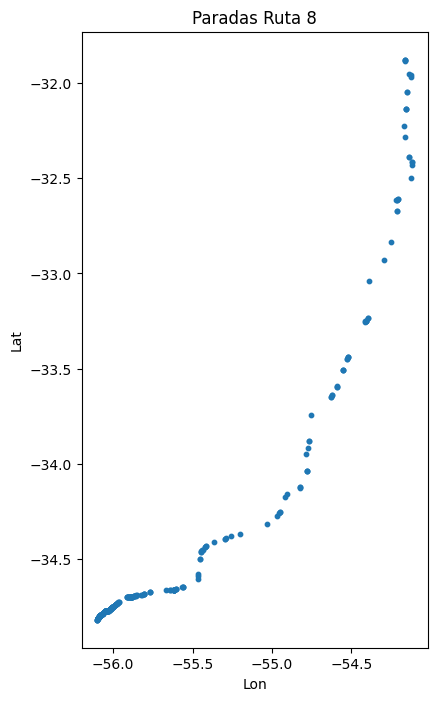

In [ ]:
ax = gdf.plot(figsize=(6,8), markersize=10)
ax.set_title("Paradas Ruta 8"); ax.set_xlabel("Lon"); ax.set_ylabel("Lat")


<Axes: >

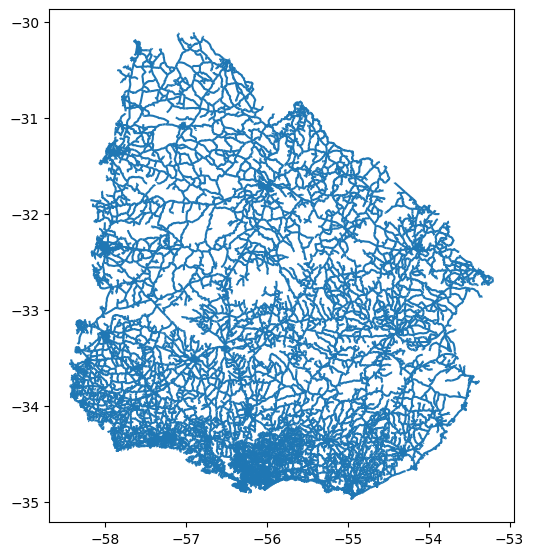

In [ ]:
roads.plot(figsize=(6,8))

# Eliminacion de paradas repetidas

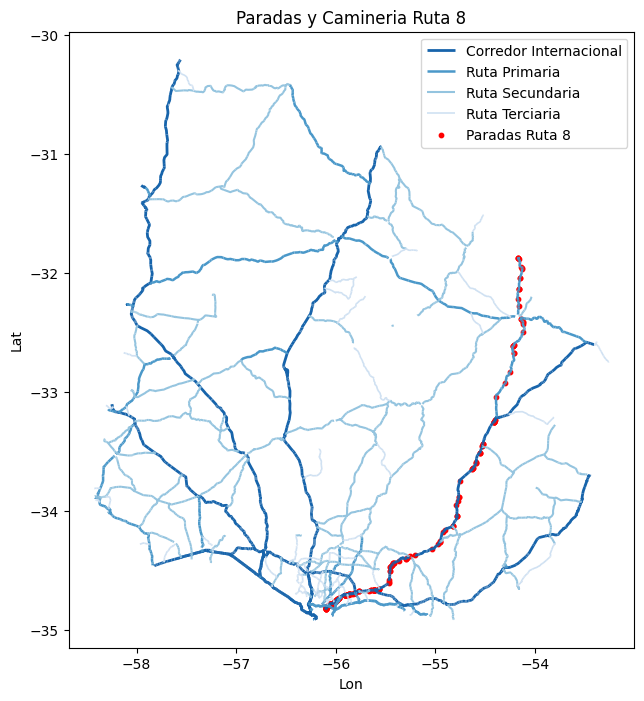

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
#fig, ax = plt.subplots(1, 1, figsize=(10, 10))

# Filter out invalid geometries from roads
roads_valid = roads[roads.geometry.is_valid].reset_index(drop=True)

# Paleta de 4 azules distintos
azules = sns.color_palette("Blues", 4).as_hex()

fig, ax = plt.subplots(figsize=(8,8))

roads_valid[roads_valid["categoria"]=="CORREDOR INTERNACIONAL"].plot(
    ax=ax, color=azules[3], linewidth=2, label="Corredor Internacional"
)
roads_valid[roads_valid["categoria"]=="RUTA PRIMARIA"].plot(
    ax=ax, color=azules[2], linewidth=1.8, label="Ruta Primaria"
)
roads_valid[roads_valid["categoria"]=="RUTA SECUNDARIA"].plot(
    ax=ax, color=azules[1], linewidth=1.5, label="Ruta Secundaria"
)
roads_valid[roads_valid["categoria"]=="RUTA TERCIARIA"].plot(
    ax=ax, color=azules[0], linewidth=1.2, label="Ruta Terciaria"
)


# Plot the bus stops
gdf.plot(ax=ax, color='red', markersize=10, label='Paradas Ruta 8')

ax.set_title("Paradas y Camineria Ruta 8");
ax.set_xlabel("Lon");
ax.set_ylabel("Lat");
plt.legend()
plt.show()

In [ ]:
gdf_m = gdf.to_crs(32721)

In [ ]:
repetidos = []

for i1, i in enumerate(gdf_m['geometry']):
  for j1, j in enumerate(gdf_m['geometry']):
    if i1 < j1 and i.distance(j) < 100:
      repetidos.append((i1, j1))

print("Number of pairs of points less than 50 meters apart:", len(repetidos))

Number of pairs of points less than 50 meters apart: 358


In [ ]:
projected_gdf = gdf_m

In [ ]:
from sklearn.cluster import DBSCAN
import numpy as np


coords = np.column_stack([gdf_m.geometry.x.values, gdf_m.geometry.y.values])

# eps=1000 m, min_samples=1 -> cada punto queda en un cluster según conectividad por umbral
# (usa euclídea en metros porque estamos en UTM)
labels = DBSCAN(eps=100.0, min_samples=1, metric="euclidean").fit(coords).labels_

gdf_m = gdf_m.copy()
gdf_m["cluster_100"] = labels   # -1 sería "ruido" si min_samples>1

# Ejemplo: agrupar y contar miembros por cluster
cluster_sizes = gdf_m.groupby("cluster_100").size().sort_values(ascending=False)

# Si quieres exportar por cluster o visualizar:
# gdf_m.to_crs(4326).to_file("paradas_cluster_1km.geojson", driver="GeoJSON")


In [ ]:
len(cluster_sizes)

122

In [ ]:
import geopandas as gpd

# Path to the GeoJSON file in your Google Drive
# You might need to adjust this path based on where the file is located in your Drive
geojson_path = '/content/drive/MyDrive/Tesis/Datos/Paradas_omnibus_UY.geojson'

# Read the GeoJSON file into a GeoDataFrame
paradas_uy = gpd.read_file(geojson_path)

if route_8.crs.to_epsg() == 4326:
    try:
        route_8_proj = route_8.to_crs(projected_gdf.crs)
        paradas_uy_proj = paradas_uy.to_crs(projected_gdf.crs)
    except NameError:
        approx_lon = route_8.geometry.unary_union.centroid.x
        utm_zone = int(np.floor((approx_lon + 180) / 6) + 1)
        target_crs = f'EPSG:{26900 + utm_zone}' # Using a generic UTM WGS84 code
        route_8_proj = route_8.to_crs(target_crs)
        paradas_uy_proj = paradas_uy.to_crs(target_crs)

else:
    route_8_proj = route_8
    paradas_uy_proj = paradas_uy.to_crs(route_8.crs)
distance_to_route8 = paradas_uy_proj.distance(route_8_proj.geometry.unary_union)

stops_within_100m = paradas_uy[distance_to_route8 <= 100]

print(f"Number of stops within 100 meters of Route 8: {len(stops_within_100m)}")

Number of stops within 100 meters of Route 8: 98


/tmp/ipython-input-2267916133.py:24: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  distance_to_route8 = paradas_uy_proj.distance(route_8_proj.geometry.unary_union)


In [ ]:
# Group by the 'cluster_100' column and take the first element of each group
gdf_m_unique = gdf_m.groupby('cluster_100').first()

# Keep only the geometry column if that's what you need for further spatial operations
# If you need other columns, you can select them after the groupby or reset the index
gdf_m_unique = gdf_m_unique[['geometry']]

# Display the head of the new GeoDataFrame
display(gdf_m_unique.head())

# Print the number of unique points
print(f"\nNumber of unique points after keeping one per cluster: {len(gdf_m_unique)}")

,geometry
cluster_100,
0,POINT (650164.377 6190676.159)
1,POINT (626501.318 6163454.81)
2,POINT (626813.871 6163482.57)
3,POINT (705623.4 6244681.315)
4,POINT (719803.018 6274256.512)



Number of unique points after keeping one per cluster: 122


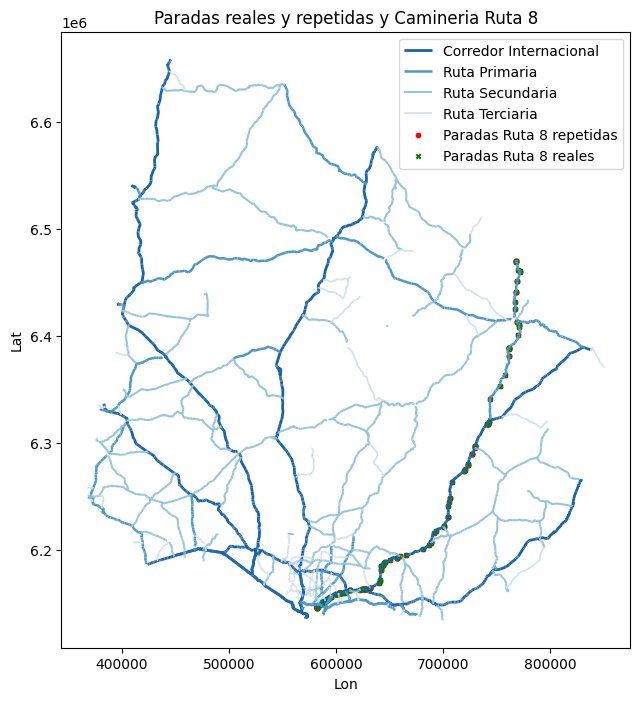

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
# Filter out invalid geometries from roads
roads_valid = roads[roads.geometry.is_valid].reset_index(drop=True).to_crs(32721)

# Paleta de 4 azules distintos
azules = sns.color_palette("Blues", 4).as_hex()

fig, ax = plt.subplots(figsize=(8,8))

roads_valid[roads_valid["categoria"]=="CORREDOR INTERNACIONAL"].plot(
    ax=ax, color=azules[3], linewidth=2, label="Corredor Internacional"
)
roads_valid[roads_valid["categoria"]=="RUTA PRIMARIA"].plot(
    ax=ax, color=azules[2], linewidth=1.8, label="Ruta Primaria"
)
roads_valid[roads_valid["categoria"]=="RUTA SECUNDARIA"].plot(
    ax=ax, color=azules[1], linewidth=1.5, label="Ruta Secundaria"
)
roads_valid[roads_valid["categoria"]=="RUTA TERCIARIA"].plot(
    ax=ax, color=azules[0], linewidth=1.2, label="Ruta Terciaria"
)


# Plot the bus stops
gdf_m.plot(ax=ax, color='red', markersize=10, label='Paradas Ruta 8 repetidas')
gdf_m_unique.plot(ax=ax, marker='x', color='green', markersize=10, label='Paradas Ruta 8 reales')

ax.set_title("Paradas reales y repetidas y Camineria Ruta 8");
ax.set_xlabel("Lon");
ax.set_ylabel("Lat");
plt.legend()
plt.show()

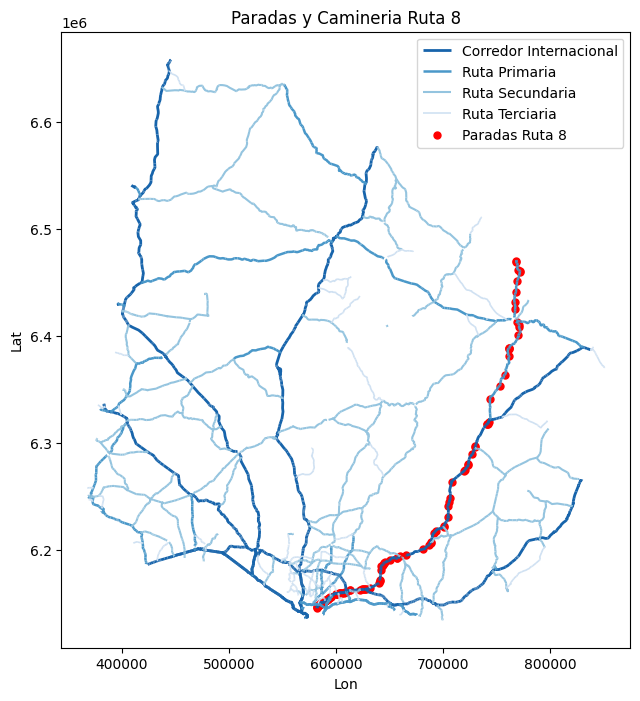

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
# Filter out invalid geometries from roads
roads_valid = roads[roads.geometry.is_valid].reset_index(drop=True).to_crs(32721)

# Paleta de 4 azules distintos
azules = sns.color_palette("Blues", 4).as_hex()

fig, ax = plt.subplots(figsize=(8,8))

roads_valid[roads_valid["categoria"]=="CORREDOR INTERNACIONAL"].plot(
    ax=ax, color=azules[3], linewidth=2, label="Corredor Internacional"
)
roads_valid[roads_valid["categoria"]=="RUTA PRIMARIA"].plot(
    ax=ax, color=azules[2], linewidth=1.8, label="Ruta Primaria"
)
roads_valid[roads_valid["categoria"]=="RUTA SECUNDARIA"].plot(
    ax=ax, color=azules[1], linewidth=1.5, label="Ruta Secundaria"
)
roads_valid[roads_valid["categoria"]=="RUTA TERCIARIA"].plot(
    ax=ax, color=azules[0], linewidth=1.2, label="Ruta Terciaria"
)


# Plot the bus stops
gdf_m_unique.plot(ax=ax, color='red', markersize=25, label='Paradas Ruta 8')

ax.set_title("Paradas y Camineria Ruta 8");
ax.set_xlabel("Lon");
ax.set_ylabel("Lat");
plt.legend()
plt.show()

--> Hacer análisis de las paradas actuales (qué distancia, que pueblo está más lejos de parada)
--> geolocalizar la población
--> crear el sistema nuevo

In [ ]:
# Perform a basic EDA on gdf_m_unique
print("Info:")
gdf_m_unique.info()

print("\nDescription:")
display(gdf_m_unique.describe())


print("\nFirst 5 rows:")
display(gdf_m_unique.head())

print("\nCoordinate Reference System:")
print(gdf_m_unique.crs)

print("\nNumber of unique points:")
print(len(gdf_m_unique))

Info:
<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 122 entries, 0 to 121
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   geometry  122 non-null    geometry
dtypes: geometry(1)
memory usage: 1.9 KB

Description:


,geometry
count,122
unique,122
top,POINT (650164.3771221607 6190676.159337392)
freq,1



First 5 rows:


,geometry
cluster_100,
0,POINT (650164.377 6190676.159)
1,POINT (626501.318 6163454.81)
2,POINT (626813.871 6163482.57)
3,POINT (705623.4 6244681.315)
4,POINT (719803.018 6274256.512)



Coordinate Reference System:
None

Number of unique points:
122


#Analisis de sistema de paradas en Ruta 8


In [ ]:
# =========================
# EDA de paradas con localidades como PUNTOS
# =========================
import geopandas as gpd
import pandas as pd
import numpy as np
from shapely.geometry import Point
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt

# --- Parámetros ---
METRIC_CRS = 32721  # UTM 21S (Uruguay), en metros
PATH_LOCALIDADES = "/content/drive/MyDrive/Tesis/Datos/merged_localidades.csv"  # ajustá si cambia
RADIUS_KM = 10  # radio máximo "razonable" para asociar una parada a una localidad (opcional)

def ensure_metric_crs(gdf, metric_crs=METRIC_CRS):
    if gdf.crs is None:
        raise ValueError("GeoDataFrame sin CRS. Asigná/reproyectá antes.")
    return gdf if gdf.crs.to_epsg() == metric_crs else gdf.to_crs(epsg=metric_crs)

# =========================
# 1) Carga de paradas (ya lo tenés en memoria como gdf_m_unique)
# =========================
gdf_paradas = gdf_m_unique.copy()
# Assign the correct CRS before calling ensure_metric_crs
gdf_paradas.crs = f'EPSG:{METRIC_CRS}'
gdf_paradas = ensure_metric_crs(gdf_paradas, METRIC_CRS)
gdf_paradas = gdf_paradas[gdf_paradas.geometry.type == "Point"].copy()
gdf_paradas["x"] = gdf_paradas.geometry.x
gdf_paradas["y"] = gdf_paradas.geometry.y

# =========================
# 2) Carga de localidades desde tu CSV (LAT/LON)
# =========================
loc = pd.read_csv(PATH_LOCALIDADES)
# Normalizo nombres esperados
loc = loc.rename(columns={"size":"poblacion"})

# Drop rows with NaN values in LON or LAT columns
loc.dropna(subset=['LON', 'LAT'], inplace=True)

# Construyo GeoDataFrame en WGS84 y paso a CRS métrico
gdf_loc_wgs = gpd.GeoDataFrame(
    loc,
    geometry=gpd.points_from_xy(loc["LON"], loc["LAT"]),
    crs=4326
)
gdf_loc = gdf_loc_wgs.to_crs(epsg=METRIC_CRS)



In [ ]:
gdf_loc.head()

,LOCALIDAD_CODE,DEPARTAMENTO,poblacion,DPTOLOC_COD,LOC_NOMBRE,DPTO_CODIGO,DPTO_NOMBRE,LAT,LON,geometry
0,1020,1,1287452,1020,MONTEVIDEO,1,Montevideo,-34.905892,-56.191310,POINT (573879.588 6137094.757)
1,15120,15,114084,15120,SALTO,15,Salto,-31.388890,-57.960888,POINT (408640.25 6526898.952)
2,10020,10,102000,10020,MALDONADO,10,Maldonado,-34.908716,-54.958272,POINT (686531.482 6135177.46)
3,13020,13,84775,13020,RIVERA,13,Rivera,-30.900058,-55.540815,POINT (639454.883 6580561.999)
4,11120,11,81550,11120,PAYSANDU,11,Paysandú,-32.321726,-58.089214,POINT (397476.156 6423381.452)


In [ ]:
# =========================
# 3bis) Filtrar LOCALIDADES a ≤ 20 km de la Ruta 8
# =========================
# Si no lo tenés cargado, descomentá y ajustá:
# route_8_proj = gpd.read_file("/content/drive/MyDrive/Tesis/Datos/route_8_proj.gpkg")


# Unificar geometría (por si tiene muchos segmentos)
route8_union = route_8_proj.union_all()

# Distancia de cada localidad a la Ruta 8 (en metros)
gdf_loc["dist_ruta8_m"] = gdf_loc.geometry.distance(route8_union)

# Filtrar localidades a ≤ 10 km
MAX_KM_RUTA = 10
gdf_loc_valid = gdf_loc[gdf_loc["dist_ruta8_m"] <= MAX_KM_RUTA * 1000].copy()

print(f"Localidades dentro de {MAX_KM_RUTA} km de la Ruta 8: {len(gdf_loc_valid)} / {len(gdf_loc)}")

# === A partir de acá, usamos SOLO gdf_loc_valid para la asignación NN ===


Localidades dentro de 10 km de la Ruta 8: 80 / 462


In [ ]:
gdf_loc_valid

,LOCALIDAD_CODE,DEPARTAMENTO,poblacion,DPTOLOC_COD,LOC_NOMBRE,DPTO_CODIGO,DPTO_NOMBRE,LAT,LON,geometry,dist_ruta8_m
7,4020,4,56013,4020,MELO,4,Cerro Largo,-32.368085,-54.169715,POINT (766308.641 6415240.606),570.922812
12,9220,9,38645,9220,MINAS,9,Lavalleja,-34.377399,-55.238214,POINT (661983.366 6194591.062),721.384940
16,3521,3,35660,3521,BARROS BLANCOS,3,Canelones,-34.752023,-56.000281,POINT (591502.04 6154001.056),10.720632
18,3322,3,31191,3322,PANDO,3,Canelones,-34.721323,-55.959447,POINT (595274.833 6157367.638),248.490544
20,3828,3,27190,3828,EL PINAR,3,Canelones,-34.796898,-55.907669,POINT (599924.824 6148936.173),9240.001424
...,...,...,...,...,...,...,...,...,...,...,...
476,3349,3,115,3349,PILAR DE LOS HORNEROS,3,Canelones,-34.792847,-55.972552,POINT (593993.745 6149448.058),5129.212056
477,9821,9,113,9821,COLON,9,Lavalleja,-33.876818,-54.720896,POINT (710794.819 6249164.359),4125.656785
478,3325,3,113,3325,CUMBRES DE CARRASCO,3,Canelones,-34.763052,-55.958177,POINT (595343.181 6152738.817),3388.834540
491,3991,3,105,3991,VILLA JUANA,3,Canelones,-34.776172,-55.894037,POINT (601197.238 6151221.001),8068.442981


Resumen distancias NN (m):
count      122.000000
mean      1861.096883
std       2980.949996
min        134.531270
10%        184.890600
25%        352.953764
50%        636.772278
75%       1476.165513
90%       6320.911127
95%       8817.354859
max      15228.345755
Name: dist_nn_m, dtype: float64


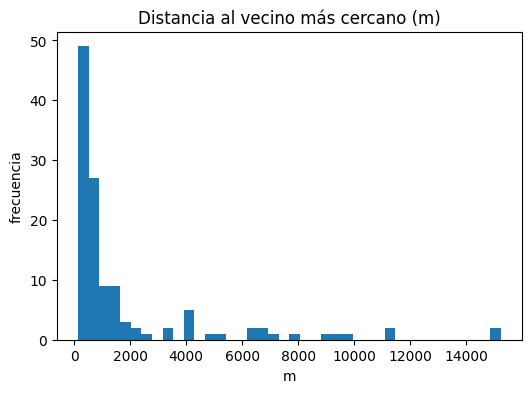

In [ ]:
# =========================
# 3) Distancia al vecino más cercano entre paradas
# =========================
from sklearn.neighbors import NearestNeighbors

coords_p = np.c_[gdf_paradas["x"].to_numpy(), gdf_paradas["y"].to_numpy()]
nbrs_p = NearestNeighbors(n_neighbors=2, algorithm="ball_tree").fit(coords_p)
dists_p, idxs_p = nbrs_p.kneighbors(coords_p)
gdf_paradas["dist_nn_m"] = dists_p[:,1]  # col 1 = vecino más cercano (col 0 es el mismo punto)

print("Resumen distancias NN (m):")
print(gdf_paradas["dist_nn_m"].describe(percentiles=[0.1,0.25,0.5,0.75,0.9,0.95]))

plt.figure(figsize=(6,4))
plt.hist(gdf_paradas["dist_nn_m"], bins=40)
plt.title("Distancia al vecino más cercano (m)")
plt.xlabel("m")
plt.ylabel("frecuencia")
plt.show()


In [ ]:

# =========================
# 4) Asignación de cada parada a la LOCALIDAD más cercana (usando SOLO las válidas)
# =========================
# Si por el filtro quedaran 0 localidades, cortamos:
if len(gdf_loc_valid) == 0:
    raise ValueError("No hay localidades a ≤ 20 km de la Ruta 8 con el filtro actual.")

# Reindex limpio para que 'loc_idx' alinee
gdf_loc_valid = gdf_loc_valid.reset_index(drop=True)

coords_l = np.c_[gdf_loc_valid.geometry.x.to_numpy(), gdf_loc_valid.geometry.y.to_numpy()]
nbrs_l = NearestNeighbors(n_neighbors=1, algorithm="ball_tree").fit(coords_l)
coords_p = np.c_[gdf_paradas["x"].to_numpy(), gdf_paradas["y"].to_numpy()]
dists_pl, idxs_pl = nbrs_l.kneighbors(coords_p)

gdf_paradas["loc_idx"] = idxs_pl[:, 0]
gdf_paradas["dist_a_loc_m"] = dists_pl[:, 0]

# (Opcional) mantener tu umbral de “localidad razonable”
RADIUS_KM = 10
gdf_paradas["sin_localidad_cercana"] = gdf_paradas["dist_a_loc_m"] > (RADIUS_KM * 1000)

# Traer atributos de la localidad válida
cols_loc_keep = ["LOC_NOMBRE","DPTO_NOMBRE","poblacion","LOCALIDAD_CODE","DEPARTAMENTO","DPTO_CODIGO","DPTOLOC_COD","dist_ruta8_m"]
gdf_paradas = gdf_paradas.join(
    gdf_loc_valid[cols_loc_keep].reset_index(drop=True),
    on="loc_idx",
    rsuffix="_loc"
)

# =========================
# 5) Agregación por localidad (solo localidades dentro de 20 km)
# =========================
agr = (
    gdf_paradas[~gdf_paradas["sin_localidad_cercana"]]
    .groupby("loc_idx")
    .agg(
        paradas=("geometry","count"),
        dist_nn_mediana=("dist_nn_m","median"),
        dist_nn_p95=("dist_nn_m", lambda s: np.percentile(s.dropna(),95) if len(s.dropna()) else np.nan),
        dist_media_a_loc_m=("dist_a_loc_m","mean"),
        dist_mediana_a_loc_m=("dist_a_loc_m","median")
    )
)

gdf_loc_agr = gdf_loc_valid.join(agr, how="left")
gdf_loc_agr["paradas"] = gdf_loc_agr["paradas"].fillna(0).astype(int)

gdf_loc_agr["paradas_por_1000"] = np.where(
    (gdf_loc_agr["poblacion"].notna()) & (gdf_loc_agr["poblacion"]>0),
    gdf_loc_agr["paradas"] / gdf_loc_agr["poblacion"] * 1000.0,
    np.nan
)
# =========================
# 6) Visuales y export
# =========================
ranking = gdf_loc_agr[
    ["LOC_NOMBRE","DPTO_NOMBRE","poblacion","paradas","paradas_por_1000","dist_nn_mediana","dist_nn_p95",
     "dist_media_a_loc_m","dist_mediana_a_loc_m","dist_ruta8_m"]
].sort_values("paradas_por_1000", ascending=False)

print("\nTOP 10 localidades por paradas/1000 hab (≤20 km Ruta 8):")
print(ranking.head(10))
print("\nBOTTOM 10 localidades por paradas/1000 hab (≤20 km Ruta 8):")
print(ranking.tail(10))



TOP 10 localidades por paradas/1000 hab (≤20 km Ruta 8):
                     LOC_NOMBRE     DPTO_NOMBRE  poblacion  paradas  \
68            PIEDRAS DE AFILAR       Canelones        149        6   
53          COLINAS DE CARRASCO       Canelones        464       16   
55              PIEDRA DEL TORO       Canelones        334       10   
71                    ARAMENDIA       Lavalleja        138        4   
64                VILLA SERRANA       Lavalleja        215        4   
63                     ARBOLITO     Cerro Largo        217        4   
76                        COLON       Lavalleja        113        2   
73                   LA PEDRERA     Cerro Largo        132        2   
61  BARRIO LA CORONILLA - ANCAP       Lavalleja        270        3   
37                   VILLA SARA  Treinta y Tres       1309        3   

    paradas_por_1000  dist_nn_mediana  dist_nn_p95  dist_media_a_loc_m  \
68         40.268456      1028.782580  3226.609458         2710.839272   
53         3

### Analisis de cobertura de paradas

In [ ]:
ranking

,LOC_NOMBRE,DPTO_NOMBRE,poblacion,paradas,paradas_por_1000,dist_nn_mediana,dist_nn_p95,dist_media_a_loc_m,dist_mediana_a_loc_m,dist_ruta8_m
68,PIEDRAS DE AFILAR,Canelones,149,6,40.268456,1028.782580,3226.609458,2710.839272,2798.486515,628.947745
53,COLINAS DE CARRASCO,Canelones,464,16,34.482759,309.702087,549.577131,3421.131463,3296.069236,2000.414295
55,PIEDRA DEL TORO,Canelones,334,10,29.940120,581.764755,746.213723,2537.146333,2236.100939,46.965072
71,ARAMENDIA,Lavalleja,138,4,28.985507,1059.685611,1357.628309,3302.895856,3423.431226,308.914068
64,VILLA SERRANA,Lavalleja,215,4,18.604651,1624.620349,6527.988411,6381.498123,6465.500021,2318.406327
...,...,...,...,...,...,...,...,...,...,...
72,LAS HIGUERITAS,Canelones,133,0,0.000000,NaN,NaN,NaN,NaN,5855.058873
75,PILAR DE LOS HORNEROS,Canelones,115,0,0.000000,NaN,NaN,NaN,NaN,5129.212056
77,CUMBRES DE CARRASCO,Canelones,113,0,0.000000,NaN,NaN,NaN,NaN,3388.834540
78,VILLA JUANA,Canelones,105,0,0.000000,NaN,NaN,NaN,NaN,8068.442981


In [ ]:
# definimos las condiciones sobre la columna 'poblacion'
conditions = [
    gdf_loc_agr["poblacion"] < 2000,
    (gdf_loc_agr["poblacion"] >= 2000) & (gdf_loc_agr["poblacion"] < 5000),
    (gdf_loc_agr["poblacion"] >= 5000) & (gdf_loc_agr["poblacion"] < 10000),
    gdf_loc_agr["poblacion"] >= 10000
]

# definimos las categorías correspondientes
choices = ["localidad", "pueblo", "villa", "ciudad"]

# creamos la nueva columna
gdf_loc_agr["categoria"] = np.select(conditions, choices, default="sin_dato")

marker_sizes = {
    "localidad": 20,
    "pueblo": 50,
    "villa": 100,
    "ciudad": 200,
}

azules = sns.color_palette("Blues", 4).as_hex()

# Map the 'categoria' column to marker sizes
gdf_loc_agr["marker_size"] = gdf_loc_agr["categoria"].map(marker_sizes)


In [ ]:
# Define marker sizes for each category

def graficar_paradas(gdf_paradas):
    marker_sizes = {
        "localidad": 20,
        "pueblo": 50,
        "villa": 100,
        "ciudad": 200,
    }

    azules = sns.color_palette("Blues", 4).as_hex()

    # Map the 'categoria' column to marker sizes
    gdf_loc_agr["marker_size"] = gdf_loc_agr["categoria"].map(marker_sizes)

    ax = gdf_loc_agr.plot(
        figsize=(20,15),
        markersize="marker_size",
        column="categoria",
        legend=True
    )

    roads_valid[roads_valid["categoria"]=="CORREDOR INTERNACIONAL"].plot(
        ax=ax, color=azules[3], linewidth=2, label="Corredor Internacional"
    )
    roads_valid[roads_valid["categoria"]=="RUTA PRIMARIA"].plot(
        ax=ax, color=azules[2], linewidth=1.8, label="Ruta Primaria"
    )
    roads_valid[roads_valid["categoria"]=="RUTA SECUNDARIA"].plot(
        ax=ax, color=azules[1], linewidth=1.5, label="Ruta Secundaria"
    )
    roads_valid[roads_valid["categoria"]=="RUTA TERCIARIA"].plot(
        ax=ax, color=azules[0], linewidth=1.2, label="Ruta Terciaria"
    )

    route_8_proj.plot(ax=ax, linewidth=1.5, color="orange")  # trazo de la ruta
    gdf_paradas.plot(ax=ax, marker='X', color="green", markersize=20)
    #route_8_proj.plot(ax=ax, linewidth=1.5, color="black")  # trazo de la ruta
    ax.set_title("Paradas por 1.000 hab (localidades ≤20 km de Ruta 8)")

    plt.show()

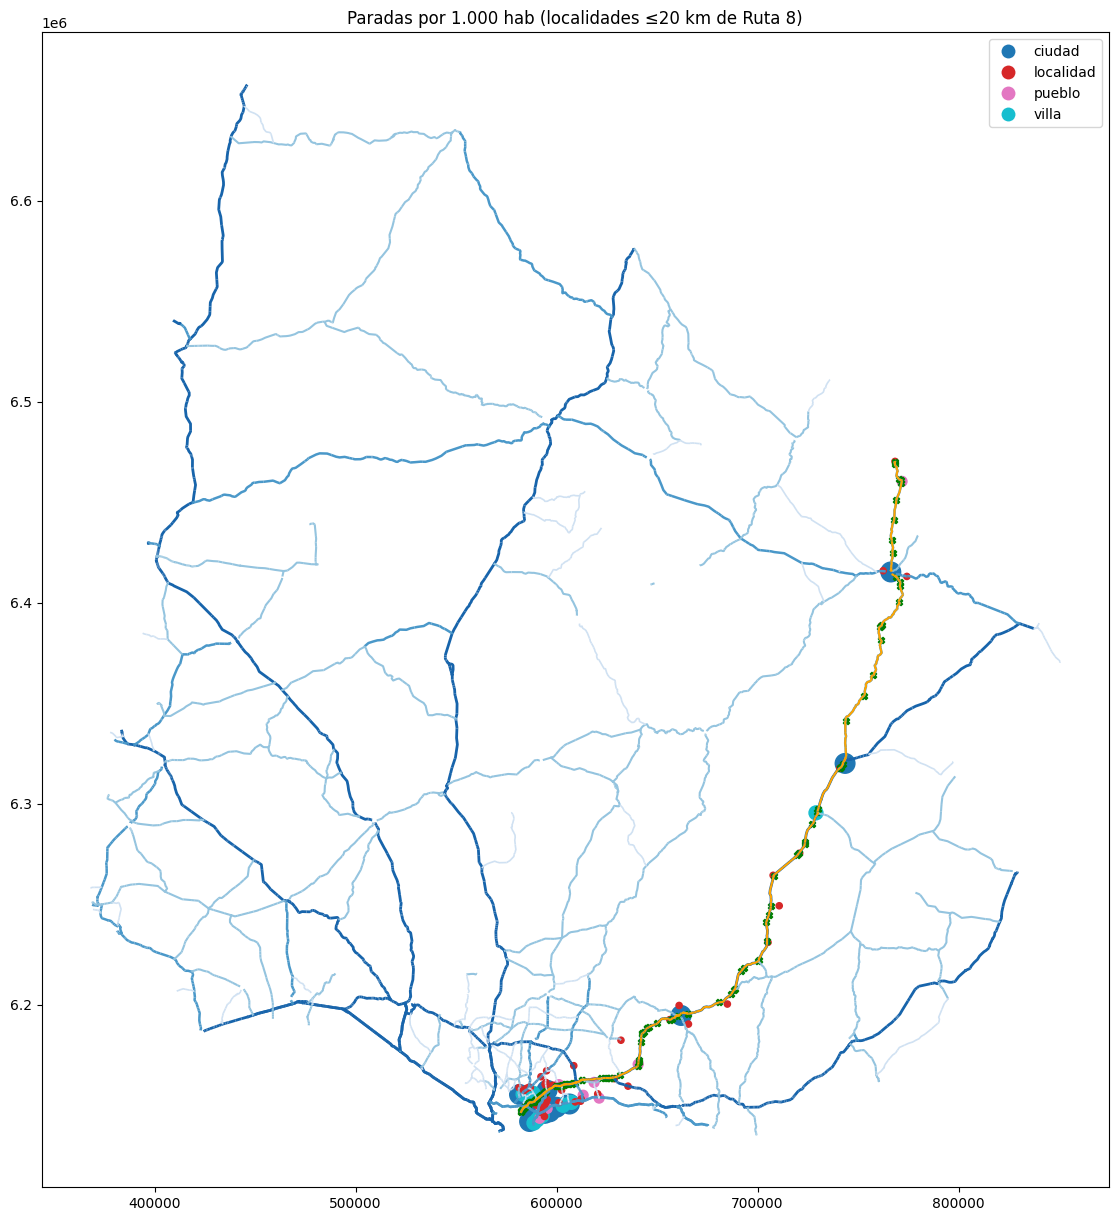

In [ ]:
graficar_paradas(gdf_paradas)

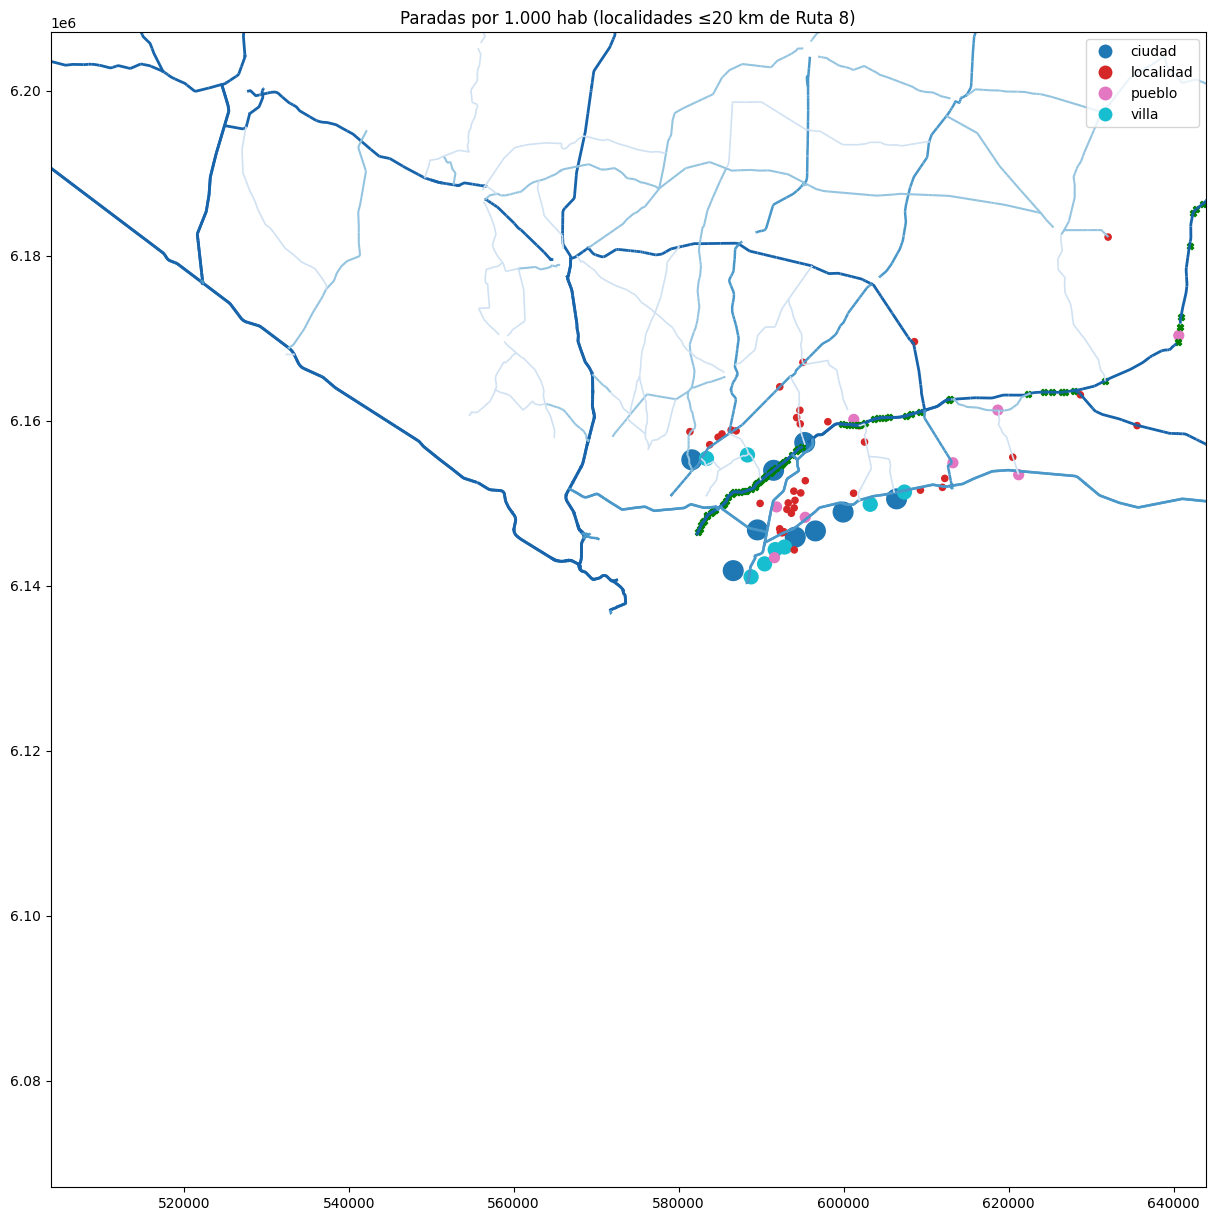

In [ ]:
# Map the 'categoria' column to marker sizes
gdf_loc_agr["marker_size"] = gdf_loc_agr["categoria"].map(marker_sizes)

ax = gdf_loc_agr.plot(
    figsize=(20,15),
    markersize="marker_size",
    column="categoria",
    legend=True
)

roads_valid[roads_valid["categoria"]=="CORREDOR INTERNACIONAL"].plot(
    ax=ax, color=azules[3], linewidth=2, label="Corredor Internacional"
)
roads_valid[roads_valid["categoria"]=="RUTA PRIMARIA"].plot(
    ax=ax, color=azules[2], linewidth=1.8, label="Ruta Primaria"
)
roads_valid[roads_valid["categoria"]=="RUTA SECUNDARIA"].plot(
    ax=ax, color=azules[1], linewidth=1.5, label="Ruta Secundaria"
)
roads_valid[roads_valid["categoria"]=="RUTA TERCIARIA"].plot(
    ax=ax, color=azules[0], linewidth=1.2, label="Ruta Terciaria"
)


gdf_paradas.plot(ax=ax, marker='X', color="green", markersize=20)
#route_8_proj.plot(ax=ax, linewidth=1.5, color="black")  # trazo de la ruta
ax.set_title("Paradas por 1.000 hab (localidades ≤20 km de Ruta 8)")
montevideo_coords = gdf_loc[gdf_loc['LOC_NOMBRE'] == 'MONTEVIDEO'].geometry.iloc[0]

# Define the zoom level in meters (30 km = 30000 meters)
zoom_level_m = 70 * 1000

# Set the x and y limits for the zoom
ax.set_xlim([montevideo_coords.x - zoom_level_m, montevideo_coords.x + zoom_level_m])
ax.set_ylim([montevideo_coords.y - zoom_level_m, montevideo_coords.y + zoom_level_m])

plt.show()
# Get the coordinates of Montevideo from gdf_loc_agr


In [ ]:
type(route_8_proj)

geopandas.geodataframe.GeoDataFrame

In [ ]:
route8_union = route_8_proj.union_all()
type(route8_union)
# Distancia de cada localidad a la Ruta 8 (en metros)
#gdf_loc_agr["dist_ruta8_m"] = gdf_loc_agr.geometry.distance(route8_union)

shapely.geometry.multilinestring.MultiLineString

#Creacion del nuevo sistema de paradas en Ruta 8


## Siguiendo el paper Yuan Zhu y Jingqiao Yu

In [ ]:
import math
from dataclasses import dataclass
from typing import Tuple, Optional
from shapely.ops import unary_union, linemerge, snap
from shapely.geometry import LineString, MultiLineString, Point
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import geopandas as gpd
from sklearn.cluster import KMeans

def _merged_route_line(roads: gpd.GeoDataFrame,S = 100)-> list:
    u = unary_union(roads.geometry.values)
    u = snap(u, u, S)       # cierra micro-gaps reales
    merged = linemerge(u)
    parts = merged.geoms if isinstance(merged, MultiLineString) else [merged]
    lines = sorted(list(merged.geoms), key=lambda g: (g.bounds[1], g.bounds[0]))
    return lines

def points_every(line, step) -> list:
    L = line.length
    d = 0.0
    pts = []
    while d <= L:
        pts.append(line.interpolate(d))
        d += step
    return pts

def _snap_point_to_line_and_m(point: Point, line) -> Tuple[Point, float]:
    """
    Snaps a point to a LineString or MultiLineString and returns the snapped point
    and the m-value (distance along the line from the start).
    """
    from shapely.ops import nearest_points

    if isinstance(line, LineString):
        snapped = nearest_points(point, line)[0]
        coords = list(line.coords)
        dists = [0.0]
        for i in range(1, len(coords)):
            dists.append(dists[-1] + Point(coords[i-1]).distance(Point(coords[i])))
        total_len = dists[-1]
        min_dist = float("inf"); seg_idx = 0
        for i in range(1, len(coords)):
            seg = LineString([coords[i-1], coords[i]])
            d = snapped.distance(seg)
            if d < min_dist:
                min_dist = d; seg_idx = i
        a = Point(coords[seg_idx-1]); b = Point(coords[seg_idx])
        ab = np.array([b.x - a.x, b.y - a.y])
        ap = np.array([snapped.x - a.x, snapped.y - a.y])
        seg_len = np.linalg.norm(ab)
        t = 0.0 if seg_len == 0 else np.clip(np.dot(ap, ab) / (seg_len**2), 0, 1)
        m = dists[seg_idx-1] + t * seg_len
        return snapped, m

    elif isinstance(line, MultiLineString):
        min_dist = float("inf")
        best_snapped = None
        best_m = 0.0
        total_len_so_far = 0.0

        for segment in line.geoms:
            try:
                snapped_seg, m_seg = _snap_point_to_line_and_m(point, segment)
                dist_to_segment = point.distance(snapped_seg)

                if dist_to_segment < min_dist:
                    min_dist = dist_to_segment
                    best_snapped = snapped_seg
                    # Calculate m-value along the *entire* MultiLineString
                    best_m = total_len_so_far + m_seg
            except Exception:
                # Handle cases where snapping to a small segment might fail
                pass
            total_len_so_far += segment.length

        if best_snapped is None:
             # If snapping failed for all segments, return a default or raise error
             # For now, return the original point and 0 m-value as a fallback
             return point, 0.0 # Or raise an informative error

        return best_snapped, best_m

    else:
        raise TypeError("Input geometry must be a LineString or MultiLineString")


# --- Candidate generation ---
#espaciar cada 3 km

def make_candidates_along_route(roads: gpd.GeoDataFrame, spacing_m: int = 3000):
    route_line_segments = _merged_route_line(roads)
    pts = []
    Distancia = 0
    for tramo in route_line_segments:
        if Distancia > spacing_m:
          puntos = points_every(tramo, spacing_m)
          for punto in puntos:
              pts.append(punto)
          Distancia = 0
        else:
          Distancia += tramo.length

    return gpd.GeoDataFrame({"cand_id": range(len(pts))}, geometry=pts, crs=roads.crs)
                      ##################################################################
                      ###################### hasta aca funciona  #######################
                      ##################################################################
def expand_candidates(candidates, roads, expand_m: int = 500):
    route_line_segments = _merged_route_line(roads)
    new_pts = []
    # Consider a small buffer for proximity check
    buffer_distance = 1.0 # meters, adjust as needed

    for p in candidates.geometry:
        for tramo in route_line_segments:
            # Check if the point is within a small buffer of the line segment
            if p.within(tramo.buffer(buffer_distance)):
                _, m = _snap_point_to_line_and_m(p, tramo)
                for delta in (-expand_m, 0, +expand_m):
                    md = max(0, min(tramo.length, m + delta))
                    new_pts.append(tramo.interpolate(md))
                # Once a segment is found, no need to check others for this point
                break

    return gpd.GeoDataFrame(geometry=new_pts, crs=roads.crs).drop_duplicates(ignore_index=True)

In [ ]:

# --- Clustering ---
def kmeans_centers(demand_pts: gpd.GeoDataFrame, k: int):
    X = np.c_[demand_pts.geometry.x, demand_pts.geometry.y]
    km = KMeans(n_clusters=k, n_init="auto", random_state=42)
    labels = km.fit_predict(X)
    centers = km.cluster_centers_
    counts = pd.Series(labels).value_counts().sort_index().to_numpy()
    return gpd.GeoDataFrame({"weight": counts}, geometry=[Point(xy) for xy in centers], crs=demand_pts.crs)

# --- WPDM scoring ---
####### REVISAR
####### Por que proyecta en la ruta las ciudades, los candidatos ya van a estar en la ruta
import numpy as np
import pandas as pd
from pyproj import CRS


def wpdm_scores(candidates, centers, shortlist_k: int = 3, rank_weights=(1.0, 0.5, 0.2)):
    """
    candidates: GeoSeries (puntos) o array de floats (distancias euclídeas si no es Geo)
    centers: GeoDataFrame con columnas: geometry (Point) y weight (float)
    """
    shortlist_k = int(shortlist_k)
    if shortlist_k < 1:
        raise ValueError("shortlist_k debe ser >= 1")

    # Asegurar pesos suficientes (relleno con 0: más allá de los 3 primeros no suma)
    rweights = np.array(rank_weights, dtype=float)
    if len(rweights) < shortlist_k:
        rweights = np.pad(rweights, (0, shortlist_k - len(rweights)), constant_values=0.0)

    scores = np.zeros(len(candidates), dtype=float)

    use_geo = hasattr(candidates, "distance") and hasattr(centers, "geometry")
    center_weights = np.asarray(centers["weight"], dtype=float)

    for i, w in enumerate(center_weights):
        if use_geo:
            dists = np.asarray(candidates.distance(centers.geometry.iloc[i]))
        else:
            # si no es Geo, asumir candidatos y centers son arrays/series numéricas comparables
            dists = np.abs(np.asarray(candidates) - np.asarray(centers.iloc[i]))

        # Elegir los k más cercanos y ordenarlos por distancia
        k = min(shortlist_k, len(dists))
        idx = np.argpartition(dists, k-1)[:k]
        idx = idx[np.argsort(dists[idx])]
        scores[idx] += w * rweights[:k]

    return pd.DataFrame({"score": scores})

def select_top_n_with_min_spacing(
    candidates: gpd.GeoDataFrame,
    scores: pd.DataFrame,
    n: int,
    min_spacing_m: float = 100.0,
    score_col: str = "score",
    metric_crs: str = "EPSG:32721",  # UTM 21S (Uruguay): distancias en metros
):
    # --- Validaciones ---
    if not isinstance(candidates, gpd.GeoDataFrame):
        raise TypeError("candidates debe ser un GeoDataFrame.")
    if score_col not in scores.columns:
        raise ValueError(f"'{score_col}' no existe en scores.")
    if len(scores) != len(candidates):
        raise ValueError("candidates y scores deben tener el mismo largo (1:1).")
    if candidates.crs is None:
        raise ValueError("El GeoDataFrame no tiene CRS. Define uno (WGS84, etc.).")

    # Deben ser puntos
    if not (candidates.geometry.geom_type == "Point").all():
        raise ValueError("La geometría debe ser de tipo Point en todas las filas.")

    # --- Trabajar en metros ---
    crs_obj = CRS.from_user_input(candidates.crs)
    g = candidates
    if crs_obj.is_geographic:
        # reproyectamos a CRS en metros (por defecto UTM 21S)
        g = candidates.to_crs(metric_crs)

    # --- Selección ávida por score con espaciamiento mínimo ---
    order = (
        pd.DataFrame({"idx": np.arange(len(g)), "score": scores[score_col].to_numpy()})
        .dropna(subset=["score"])
        .sort_values("score", ascending=False)["idx"]
        .to_list()
    )

    chosen = []
    for idx in order:
        if len(chosen) >= n:
            break
        geom = g.geometry.iloc[idx]
        # distancia mínima al conjunto ya elegido
        if not chosen:
            chosen.append(idx)
            continue
        dmin = min(geom.distance(g.geometry.iloc[j]) for j in chosen)
        if dmin >= float(min_spacing_m):
            chosen.append(idx)

    out = candidates.iloc[chosen].copy()
    out[score_col] = scores.iloc[chosen][score_col].to_numpy()
    return out.sort_values(score_col, ascending=False).reset_index(drop=True)


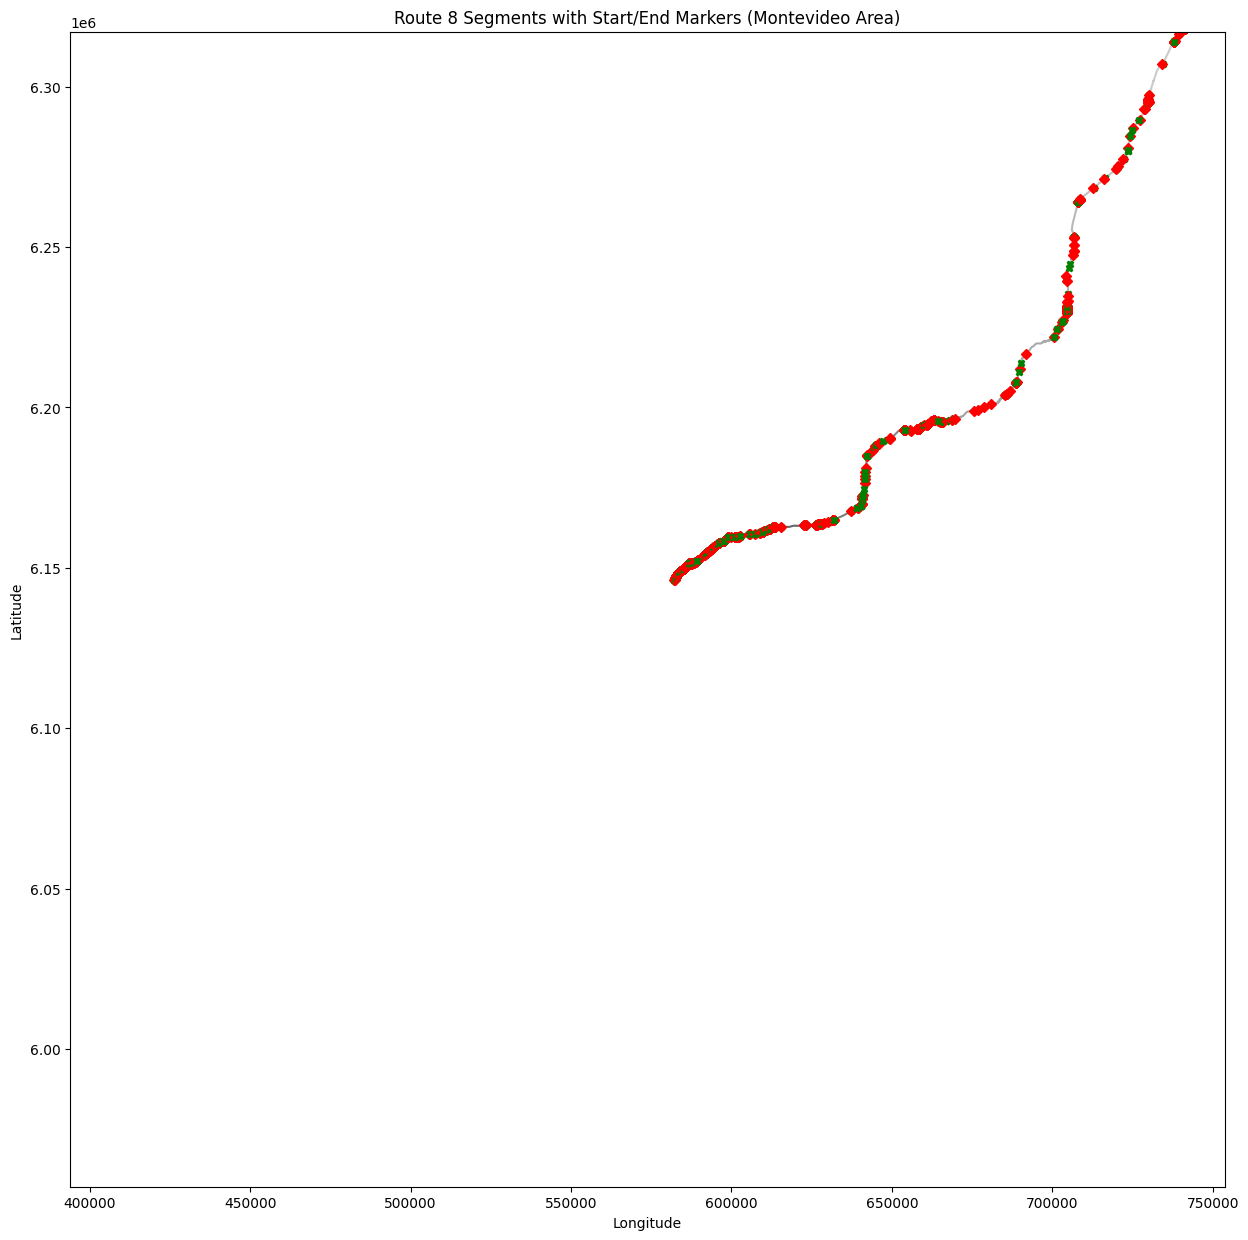

In [ ]:
#@title COMENTARIO !!!

#Los linestrings se SOLAPAN, haciendo que se contabilice varias veces un mismo tramo

# Create a GeoDataFrame from the list of LineStrings
tramo_gdf = gpd.GeoDataFrame(geometry=_merged_route_line(route_8_proj))

# Generate a color gradient from black to white
num_segments = len(tramo_gdf)
colors = [plt.cm.gray(i/num_segments) for i in range(num_segments)]

# Assign a color to each segment
tramo_gdf['color'] = colors

# Get the coordinates of Montevideo from gdf_loc_agr
montevideo_coords = gdf_loc[gdf_loc['LOC_NOMBRE'] == 'MONTEVIDEO'].geometry.iloc[0]
# Define the zoom level in meters
zoom_level_m = 180 * 1000

# Create a new plot for the route segments with markers and zoom
fig, ax = plt.subplots(figsize=(20,15))

# Plot the GeoDataFrame with the color gradient
tramo_gdf.plot(ax=ax, color=tramo_gdf['color'])

# Add start and end markers for each segment of route_8_proj
route_line_segments = _merged_route_line(route_8_proj)
for segment in route_line_segments:
    start_point = segment.coords[0]
    end_point = segment.coords[-1]
    ax.plot(start_point[0], start_point[1], 'D', color='red', markersize=5) # Red diamond for start
    ax.plot(end_point[0], end_point[1], 'X', color='green', markersize=5) # Green X for end

ax.set_title("Route 8 Segments with Start/End Markers (Montevideo Area)")
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")

# Apply the zoom
ax.set_xlim([montevideo_coords.x - zoom_level_m, montevideo_coords.x + zoom_level_m])
ax.set_ylim([montevideo_coords.y - zoom_level_m, montevideo_coords.y + zoom_level_m])

plt.show()

In [ ]:
cand = make_candidates_along_route(route_8_proj, 10000)
#cand.plot(color="red", ax=ax)
colors = [plt.cm.gray(i/len(cand)) for i in range(len(cand))]
cand_gdf = gpd.GeoDataFrame(geometry=cand.geometry, crs=route_8_proj.crs)
cand_gdf['color'] = colors
cand2 = expand_candidates(cand, route_8_proj, 15000)
cand2_gdf = gpd.GeoDataFrame(geometry=cand2.geometry, crs=route_8_proj.crs)


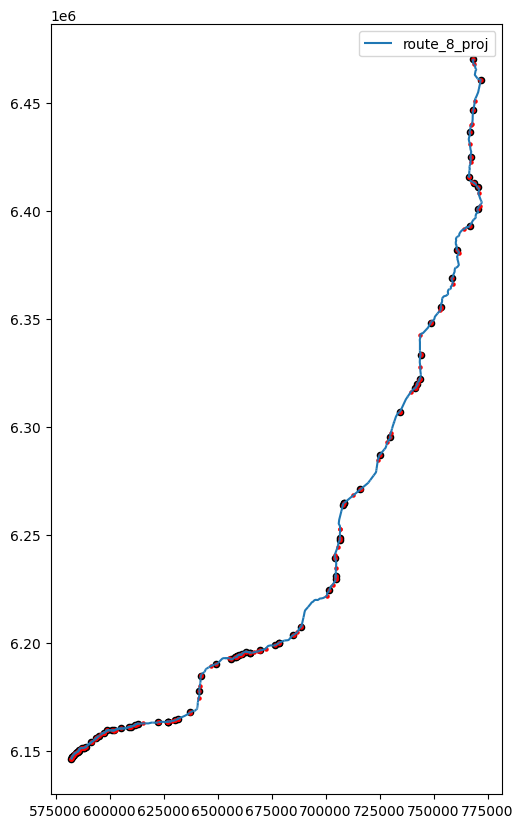

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
# Plot the GeoDataFrame with the color gradient
cand_gdf.plot(color="black", markersize=20, ax=ax)
cand2_gdf.plot(color="red", markersize=5, ax=ax)


#cand2.plot(color="black", ax=ax)
#cand2.plot(color="red",ax=ax, label='cand2')
route_8_proj.plot(ax=ax, label='route_8_proj')
plt.legend()
plt.show()

In [ ]:
# ahp.py
"""
Minimal AHP utilities.
"""
import numpy as np

RI_TABLE = {
    1: 0.00, 2: 0.00, 3: 0.58, 4: 0.90, 5: 1.12,
    6: 1.24, 7: 1.32, 8: 1.41, 9: 1.45,
    10: 1.49, 11: 1.51, 12: 1.48, 13: 1.56, 14: 1.57, 15: 1.59
}

def build_pairwise_matrix(items, comparisons, check_scale=True):
    """
    Construye la matriz de comparaciones por pares A (n x n) donde A[i,j] = importancia de i sobre j.
    - items: lista ordenada de nombres (criterios o alternativas).
    - comparisons: dict {(i,j): valor} en escala de Saaty 1–9 (o cualquier razón positiva).
      Solo hace falta consignar (i,j) o (j,i); el recíproco se completa automáticamente.
    - check_scale: si True, avisa si un valor queda fuera de [1/9, 9].
    Devuelve (A, labels).
    """
    labels = list(items)
    n = len(labels)
    idx = {name: k for k, name in enumerate(labels)}
    A = np.ones((n, n), dtype=float)
    for (i, j), v in comparisons.items():
        if i not in idx or j not in idx:
            raise ValueError(f"Unknown item in comparison: {(i,j)}")
        if v <= 0:
            raise ValueError("Comparison values must be positive.")
        if check_scale and not (1/9 <= v <= 9):
            print(f"Warning: value {v} for ({i},{j}) is outside Saaty 1..9 (or reciprocal). Proceeding.")
        A[idx[i], idx[j]] = v
        A[idx[j], idx[i]] = 1.0 / v
    np.fill_diagonal(A, 1.0)
    return A, labels

def ahp_weights(A, method="eigen"):
    """
    Calcula el vector de prioridades w a partir de la matriz A.
    method:
      - 'eigen': autovector principal (método original de Saaty)
      - 'geom': media geométrica por fila (aprox. robusta)
    Devuelve dict con:
      {
        'weights': np.array shape (n,),
        'lambda_max': float,
        'CI': float,
        'CR': float
      }
    """
    A = np.asarray(A, dtype=float)
    if A.ndim != 2 or A.shape[0] != A.shape[1]:
        raise ValueError("A must be a square matrix.")
    n = A.shape[0]

    if method == "eigen":
        vals, vecs = np.linalg.eig(A)
        idx = np.argmax(vals.real)
        w = vecs[:, idx].real
        w = np.abs(w)
    elif method == "geom":
        w = np.prod(A, axis=1) ** (1.0 / n)
    else:
        raise ValueError("method must be 'eigen' or 'geom'")

    w = w / w.sum()

    Aw = A @ w
    lambda_max = float((Aw / w).mean())
    CI = (lambda_max - n) / (n - 1) if n > 1 else 0.0
    RI = RI_TABLE.get(n, RI_TABLE[max(k for k in RI_TABLE if k <= n)])
    CR = CI / RI if RI > 0 else 0.0
    return {"weights": w, "lambda_max": lambda_max, "CI": CI, "CR": CR}

# ejemplo_ahp.py
import numpy as np

# Criterios
labels = ["POI_number", "Stops_spacing", "Stop_POI_distance"]

# Comparaciones por pares (escala de Saaty)
comparisons = {
    ("POI_number", "Stops_spacing"): 3,    # POI moderadamente > spacing
    ("POI_number", "Stop_POI_distance"): 2,# POI fuertemente > dist
    ("Stops_spacing", "Stop_POI_distance"): 0.5  # spacing ligeramente > dist
}

A, _ = build_pairwise_matrix(labels, comparisons)
res = ahp_weights(A, method="eigen")
pesos = np.round(res["weights"])
print("Matriz A:\n", np.round(A, 3))
print("Pesos:", np.round(res["weights"], 6))
print("lambda_max:", round(res["lambda_max"], 6), "CI:", round(res["CI"], 6), "CR:", round(res["CR"], 6))


Matriz A:
 [[1.    3.    2.   ]
 [0.333 1.    0.5  ]
 [0.5   2.    1.   ]]
Pesos: [0.539615 0.163424 0.296961]
lambda_max: 3.009203 CI: 0.004601 CR: 0.007933


In [ ]:
# --- AHP evaluation ---
@dataclass
class AHPWeights:
    poi_number: float = 0.539615
    stop_spacing: float = 0.163424
    poi_distance: float = 0.296961

def evaluate_stops_ahp(stops, roads, pois, weights=AHPWeights()):
    # Get the merged route geometry (can be LineString or MultiLineString)
    route_geometry = unary_union(roads.geometry.values)

    # Calculate m-values by snapping each stop to the route geometry
    mvals = stops.geometry.apply(lambda p: _snap_point_to_line_and_m(p, route_geometry)[1]).sort_values().to_numpy()

    spacings = np.diff(mvals) if len(mvals)>1 else [0]
    sp_full = np.r_[spacings[0], (spacings[:-1]+spacings[1:])/2.0, spacings[-1]] if len(mvals)>1 else [0]*len(mvals)
    #distancias entre paradas
    #distancias a mirar en el futuro, y adaptarlas segun poblacion
    spacing_score = pd.Series([1.0 if 2000<d<=15000 else 0.5 if d<=25000 else 0.2 for d in sp_full], index=stops.index)
    counts = stops.buffer(5000).apply(lambda b: pois.within(b).sum())
    #cantidad de localidades de cercanas
    poi_num_score = counts.apply(lambda c: 0.3 if c<=1 else 0.6 if c<=3 else 0.8 if c<=10 else 1.0)
    poi_dist_score = []
    #distancia promedio a las localidades mas cercanas
    for _, s in stops.iterrows():
        d = pois.distance(s.geometry)
        mask = d <= 5000
        if mask.any():
            avg = d[mask].mean()
            sc = 1.0 if avg<=2000 else 0.7 if avg<=3500 else 0.5
        else: sc = 0.5
        poi_dist_score.append(sc)
    poi_dist_score = pd.Series(poi_dist_score, index=stops.index)
    #calcula la metrica
    total = (weights.poi_number*poi_num_score +
             weights.stop_spacing*spacing_score +
             weights.poi_distance*poi_dist_score)
    df = pd.DataFrame({"poi_num": poi_num_score, "spacing": spacing_score,
                       "poi_dist": poi_dist_score, "total_score": total})
    df.attrs["overall_mean"] = float(total.mean())
    return df

def optimize_single_corridor(roads, demand_pts, pois, n_new_stops, k_clusters=None,
                             spacing_m=3000, expand_m=1500, shortlist_k=3, min_spacing_m=100):
    candidates = make_candidates_along_route(roads, spacing_m)
    print(f"Candidates: {len(candidates)}")
    candidates2 = expand_candidates(candidates, roads, expand_m)
    print(f"2 Candidates: {len(candidates2)}")
    if k_clusters is None:
        k_clusters = min(20, max(5, int(np.sqrt(len(demand_pts)))))
    centers = kmeans_centers(demand_pts, k=k_clusters)
    sc = wpdm_scores(candidates2, centers, shortlist_k) # Removed 'roads' argument
    print(f"Scores: {len(sc)}")
    new_stops = select_top_n_with_min_spacing(candidates2, sc, n=n_new_stops, min_spacing_m=min_spacing_m)
    return new_stops, sc

In [ ]:
benchmark = evaluate_stops_ahp(gdf_paradas, route_8_proj, gdf_loc_agr)['total_score']
print("Benchmark (mean):", benchmark.mean())

Benchmark (mean): 0.5118314131147541


In [ ]:
#!pip install optuna --quiet

In [ ]:
"""import optuna
from optuna.pruners import MedianPruner
from optuna.samplers import TPESampler

def objective(trial: optuna.Trial):
    # --- ESPACIO RURAL ---
    spacing_m     = trial.suggest_int("spacing_m", 2000, 40000)      # separación base de candidatos
    expand_m      = trial.suggest_int("expand_m", min(1000,spacing_m//3), min(3500, spacing_m//2))         # micro-ajuste local
    shortlist_k   = trial.suggest_categorical("shortlist_k", [2,3,4,5,6,7])
    min_spacing_m = trial.suggest_int("min_spacing_m", 2000, 5000)
    paradas = trial.suggest_int("paradas", 50, 200)

    # k_clusters moderado (rural): entre ~sqrt(N) N
    lo_k = len(gdf_loc_agr)//30
    hi_k = len(gdf_loc_agr)//2
    k_clusters   = trial.suggest_int("k_clusters", lo_k, hi_k)

    new_stops_try, wpdm_try = optimize_single_corridor(
        roads=route_8_proj,
        demand_pts=gdf_loc_agr,
        pois=gdf_loc_agr,           # si por ahora POIs=demanda como proxy, mantenemos consistencia
        n_new_stops=paradas,
        k_clusters=k_clusters,
        spacing_m=spacing_m,
        expand_m=expand_m,
        shortlist_k=shortlist_k,
        min_spacing_m=min_spacing_m
    )
    eval_try = evaluate_stops_ahp(new_stops_try, route_8_proj, gdf_loc_agr)
    score_mean = float(eval_try["total_score"].mean())
    graficar_paradas(new_stops_try)
    return score_mean

study = optuna.create_study(
    direction="maximize",
    sampler=TPESampler(seed=42),
    pruner=MedianPruner(n_warmup_steps=10),
    study_name="ruta8_rural_wpdm_ahp"
)

study.optimize(objective, n_trials=500, show_progress_bar=True)"""

'import optuna\nfrom optuna.pruners import MedianPruner\nfrom optuna.samplers import TPESampler\n\ndef objective(trial: optuna.Trial):\n    # --- ESPACIO RURAL ---\n    spacing_m     = trial.suggest_int("spacing_m", 2000, 40000)      # separación base de candidatos\n    expand_m      = trial.suggest_int("expand_m", min(1000,spacing_m//3), min(3500, spacing_m//2))         # micro-ajuste local\n    shortlist_k   = trial.suggest_categorical("shortlist_k", [2,3,4,5,6,7])\n    min_spacing_m = trial.suggest_int("min_spacing_m", 2000, 5000)\n    paradas = trial.suggest_int("paradas", 50, 200)\n\n    # k_clusters moderado (rural): entre ~sqrt(N) N\n    lo_k = len(gdf_loc_agr)//30\n    hi_k = len(gdf_loc_agr)//2\n    k_clusters   = trial.suggest_int("k_clusters", lo_k, hi_k)\n\n    new_stops_try, wpdm_try = optimize_single_corridor(\n        roads=route_8_proj,\n        demand_pts=gdf_loc_agr,\n        pois=gdf_loc_agr,           # si por ahora POIs=demanda como proxy, mantenemos consistencia\n

Candidates: 28
2 Candidates: 75
Scores: 75
0.5154353416666667
cantidad de paradas 24


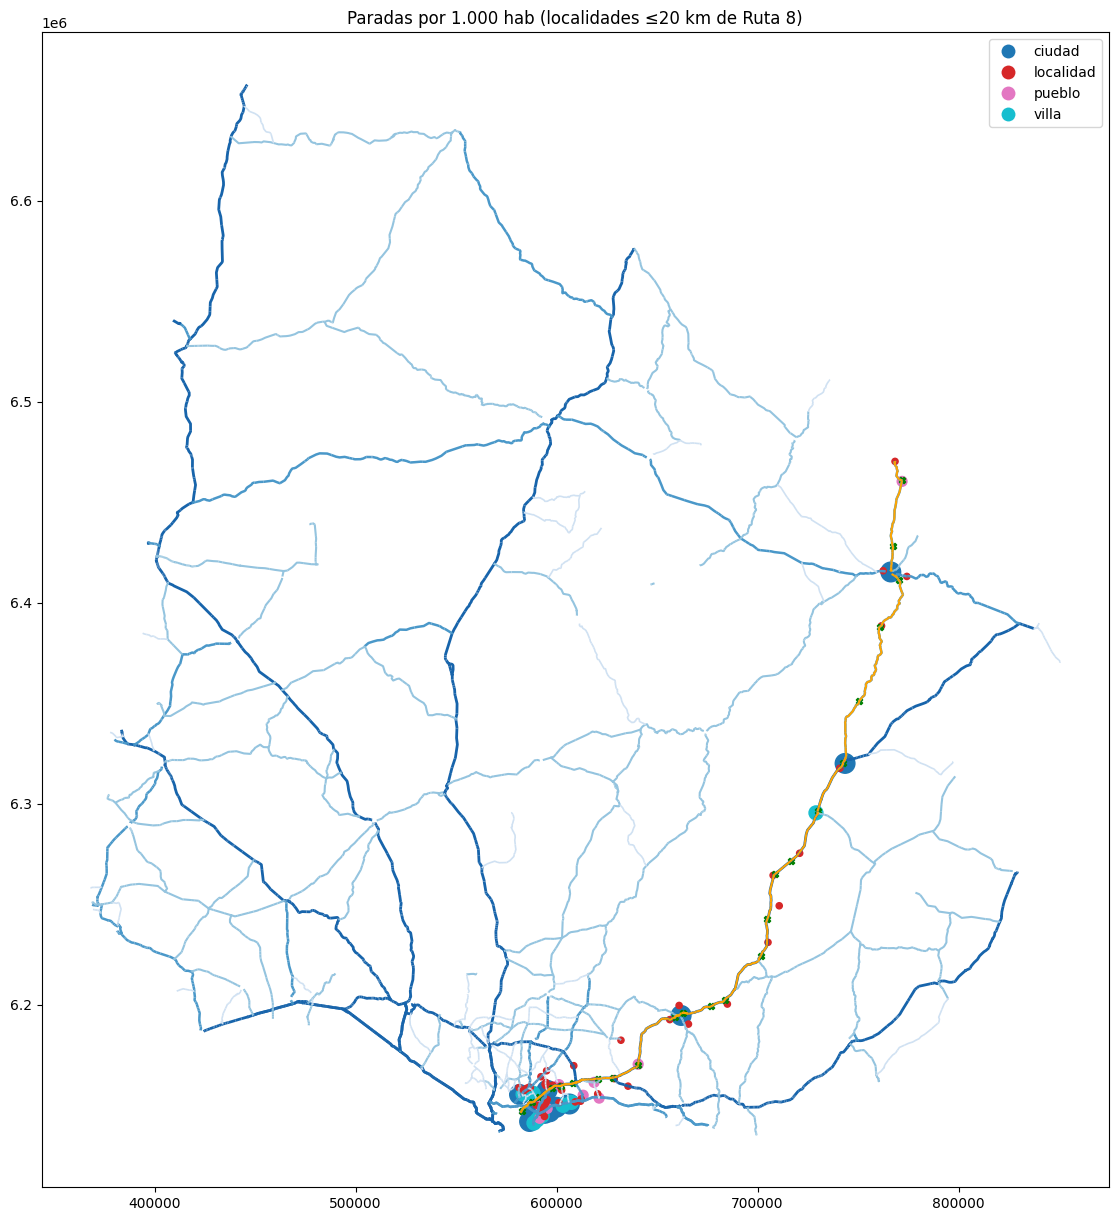

In [ ]:
#print("Mejores hiperparámetros:", study.best_params)
#print("AHP mean (max):", study.best_value)

# Recalcular con el mejor set
#bp = study.best_params
new_stops_opt, wpdm_opt = optimize_single_corridor(
    roads=route_8_proj,
    demand_pts=gdf_loc_agr,
    pois=gdf_loc_agr,
    n_new_stops=190,
    k_clusters=33,
    spacing_m=37008,
    expand_m=1862,
    shortlist_k=7,
    min_spacing_m=4077
)

eval_opt = evaluate_stops_ahp(new_stops_opt, route_8_proj, gdf_loc_agr)
float(eval_opt["total_score"].mean())
print(float(eval_opt["total_score"].mean()))
print("cantidad de paradas", len(new_stops_opt))
graficar_paradas(new_stops_opt)


spacing_m: 37008
expand_m: 1862
shortlist_k: 7
min_spacing_m: 4077
paradas: 190
k_clusters: 33

Probamos unos casos particulares para ver como afecta el espaciado inciial.
En un futuro se podrian probar distintos valores para AHP.

Candidates: 84
2 Candidates: 199
Scores: 199
0.4574160023255815
cantidad de paradas 43


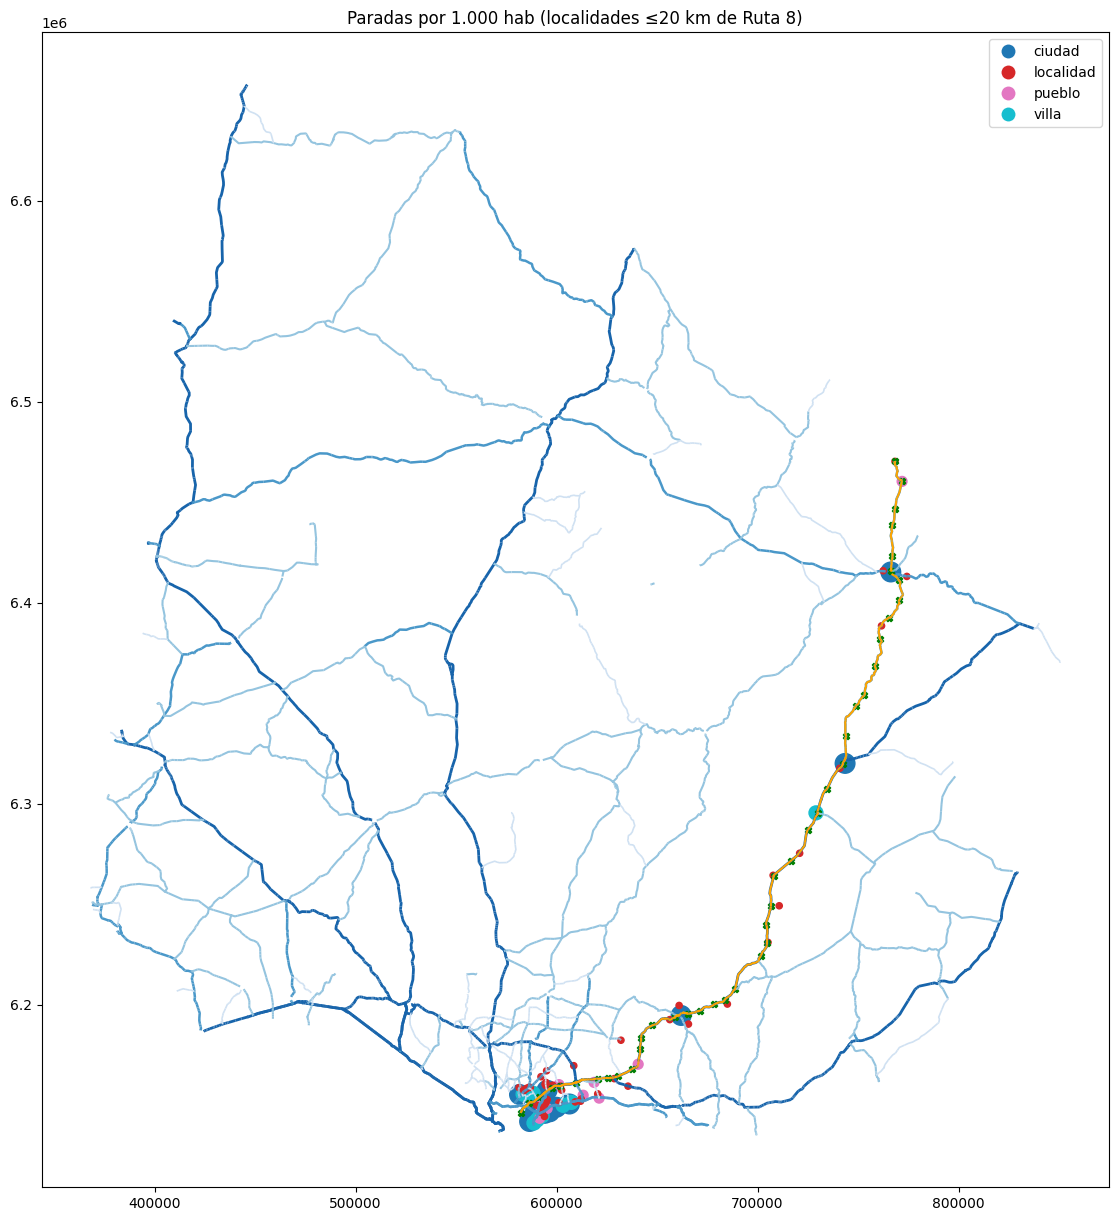

Candidates: 46
2 Candidates: 114
Scores: 114
0.50290789
cantidad de paradas 30


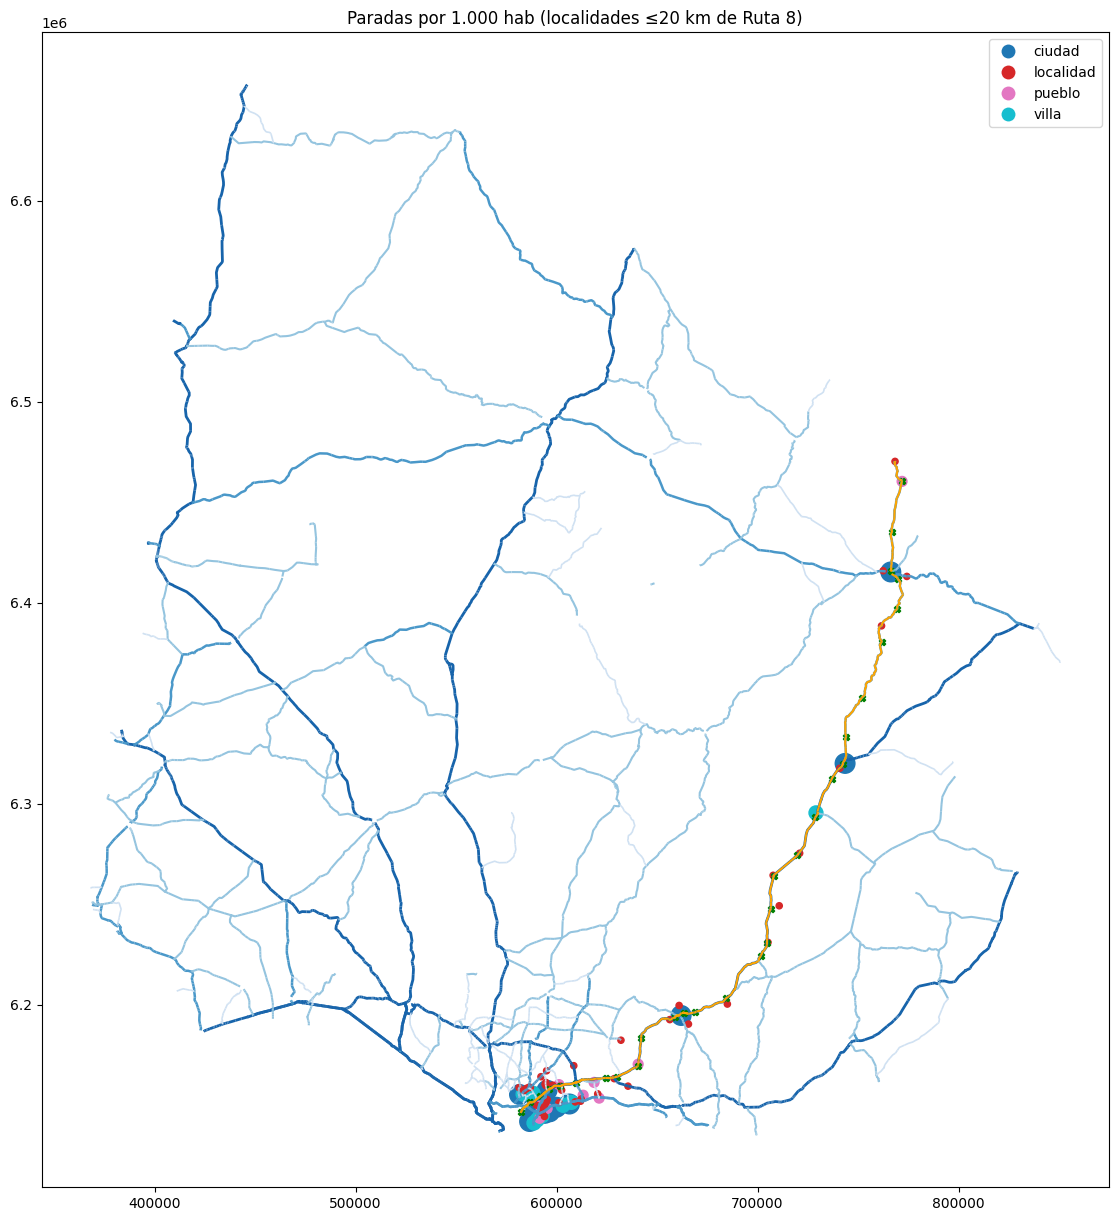

Candidates: 34
2 Candidates: 87
Scores: 87
0.503230988888889
cantidad de paradas 27


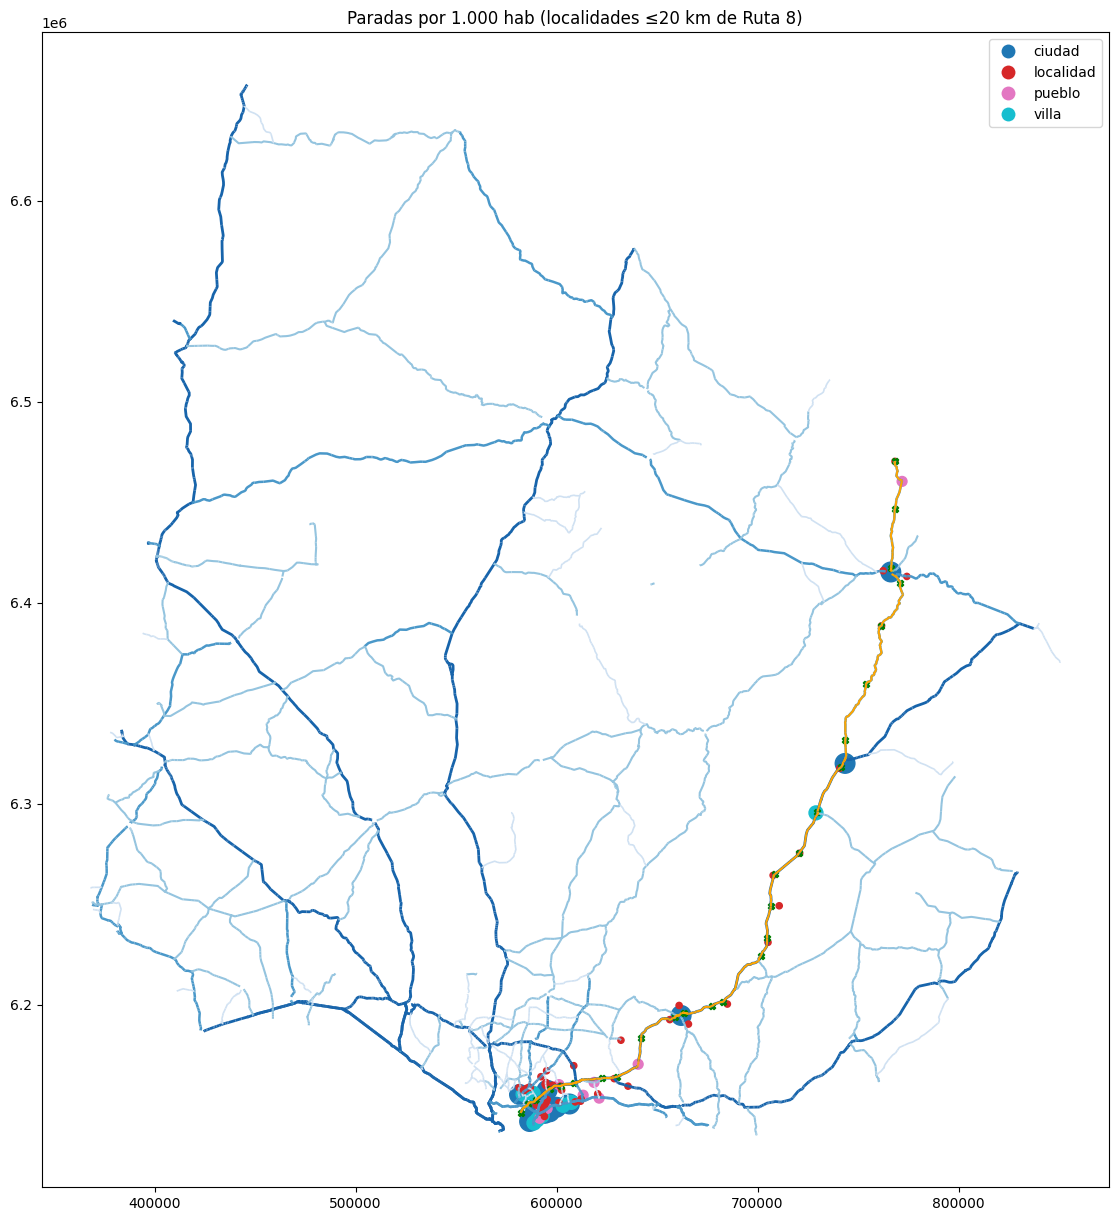

In [ ]:
for spacing in [10000, 20000, 30000] :
  new_stops_optp, wpdm_opt = optimize_single_corridor(
    roads=route_8_proj,
    demand_pts=gdf_loc_agr,
    pois=gdf_loc_agr,
    n_new_stops=190,
    k_clusters=33,
    spacing_m=spacing,
    expand_m=1862,
    shortlist_k=7,
    min_spacing_m=4077
)
  eval_opt = evaluate_stops_ahp(new_stops_optp, route_8_proj, gdf_loc_agr)
  print(float(eval_opt["total_score"].mean()))
  print("cantidad de paradas", len(new_stops_optp))
  graficar_paradas(new_stops_optp)


In [ ]:
# Convert the GeoDataFrame to WGS84 (latitude/longitude)
new_stops_wgs84 = new_stops_opt.to_crs(epsg=4326)

# Extract latitude and longitude
new_stops_wgs84['latitude'] = new_stops_wgs84.geometry.y
new_stops_wgs84['longitude'] = new_stops_wgs84.geometry.x

# Display the latitude and longitude
display(new_stops_wgs84[['latitude', 'longitude']])

,latitude,longitude
0,-34.751951,-56.000590
1,-34.775372,-56.038281
2,-34.711069,-55.934683
3,-34.700948,-55.884719
4,-34.813297,-56.095906
5,-34.688971,-55.818458
6,-34.666848,-55.683165
7,-32.404763,-54.125458
8,-33.228649,-54.397669
9,-34.385253,-55.270628


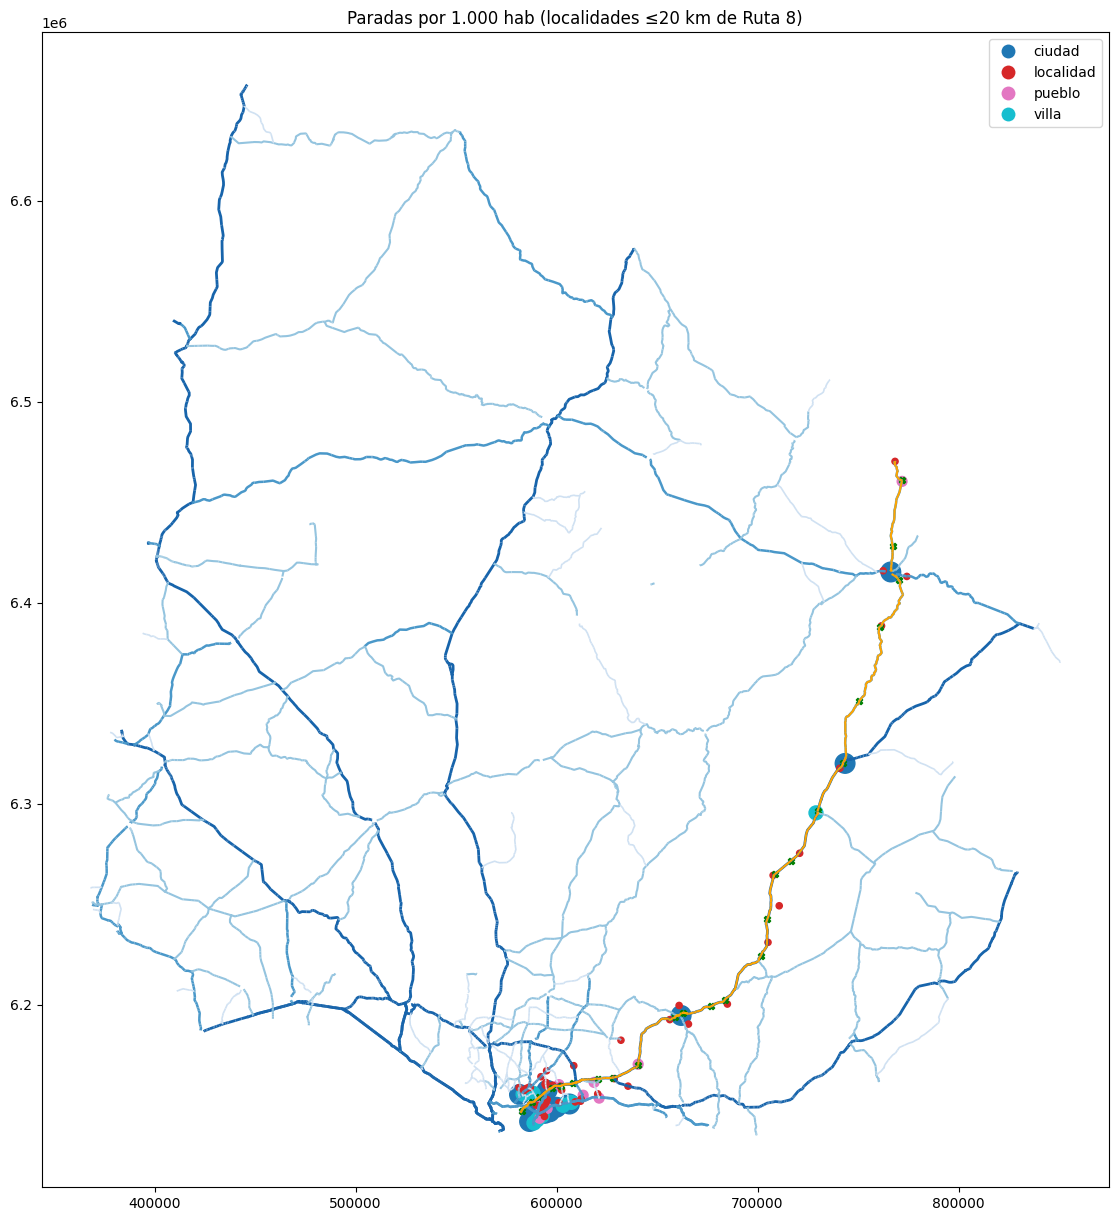

In [ ]:
graficar_paradas(new_stops_opt)

In [ ]:
"""# Save the eval_opt DataFrame to a CSV file
eval_opt.to_csv('/content/drive/MyDrive/Tesis/Datos/Ruta8/eval_opt.csv')

# Save the best parameters to a text file
with open('/content/drive/MyDrive/Tesis/Datos/Ruta8/best_params.txt', 'w') as f:
    for key, value in bp.items():
        f.write(f"{key}: {value}\n")

print("eval_opt and best_params saved to Google Drive.")"""

'# Save the eval_opt DataFrame to a CSV file\neval_opt.to_csv(\'/content/drive/MyDrive/Tesis/Datos/Ruta8/eval_opt.csv\')\n\n# Save the best parameters to a text file\nwith open(\'/content/drive/MyDrive/Tesis/Datos/Ruta8/best_params.txt\', \'w\') as f:\n    for key, value in bp.items():\n        f.write(f"{key}: {value}\n")\n\nprint("eval_opt and best_params saved to Google Drive.")'

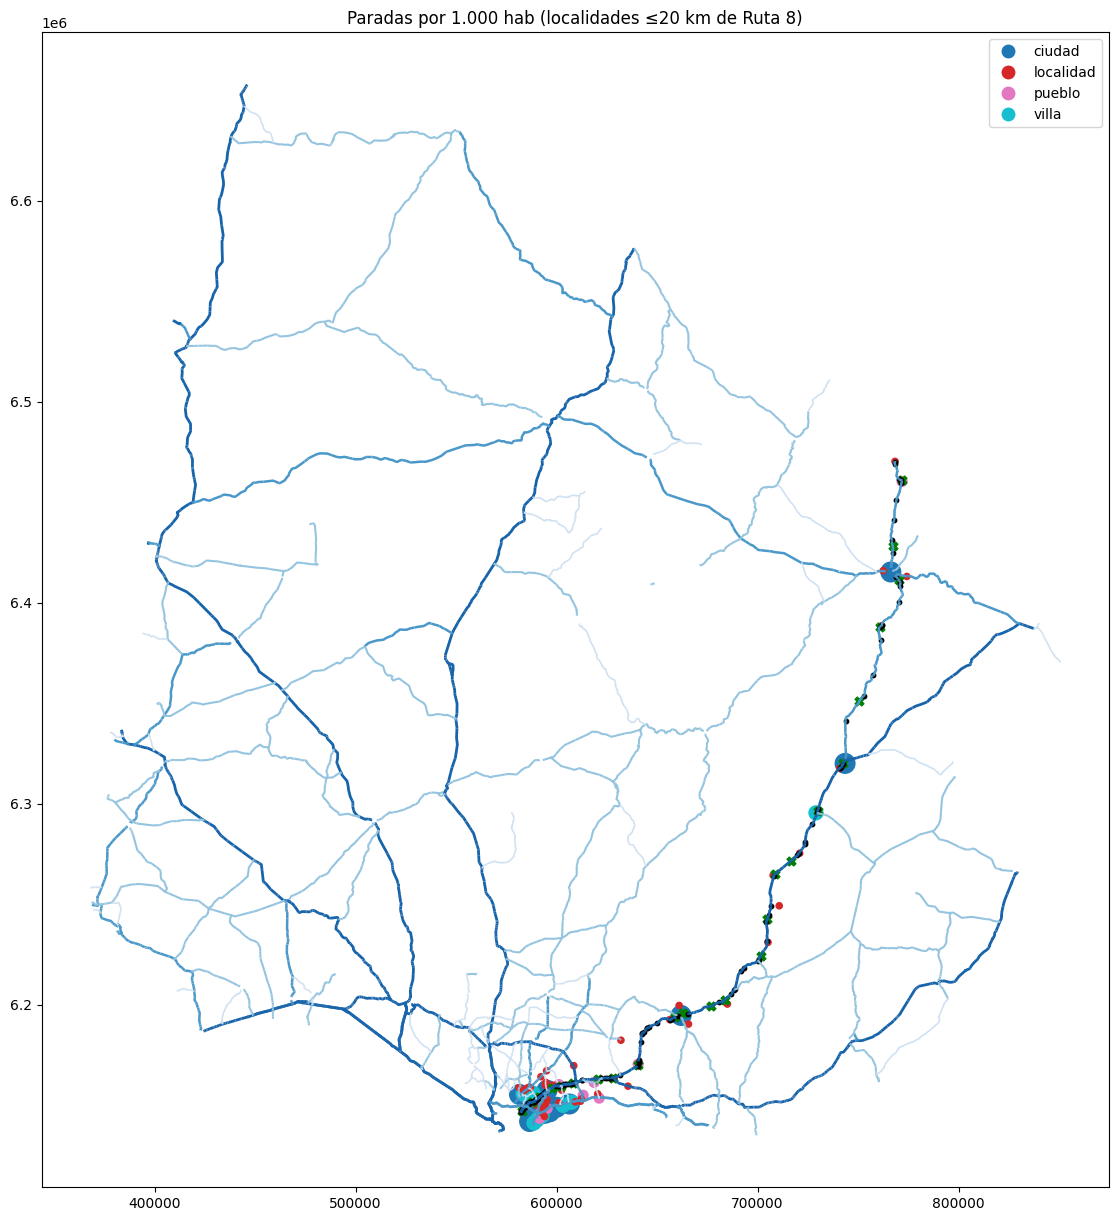

In [ ]:
azules = sns.color_palette("Blues", 4).as_hex()

# Map the 'categoria' column to marker sizes
gdf_loc_agr["marker_size"] = gdf_loc_agr["categoria"].map(marker_sizes)

ax = gdf_loc_agr.plot(
    figsize=(20,15),
    markersize="marker_size",
    column="categoria",
    legend=True
)

roads_valid[roads_valid["categoria"]=="CORREDOR INTERNACIONAL"].plot(
    ax=ax, color=azules[3], linewidth=2, label="Corredor Internacional"
)
roads_valid[roads_valid["categoria"]=="RUTA PRIMARIA"].plot(
    ax=ax, color=azules[2], linewidth=1.8, label="Ruta Primaria"
)
roads_valid[roads_valid["categoria"]=="RUTA SECUNDARIA"].plot(
    ax=ax, color=azules[1], linewidth=1.5, label="Ruta Secundaria"
)
roads_valid[roads_valid["categoria"]=="RUTA TERCIARIA"].plot(
    ax=ax, color=azules[0], linewidth=1.2, label="Ruta Terciaria"
)


new_stops_opt.plot(ax=ax, marker='X', color="green", markersize=40, label = 'new stops')
gdf_paradas.plot(ax=ax, marker='o', color="black", markersize=10, label = 'original stops')
#route_8_proj.plot(ax=ax, linewidth=1.5, color="black")  # trazo de la ruta
ax.set_title("Paradas por 1.000 hab (localidades ≤20 km de Ruta 8)")

plt.show()

## Algoritmos evolutivos

In [ ]:
!pip install deap --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 136.0/136.0 kB 3.9 MB/s eta 0:00:00


In [ ]:
import numpy as np, random, multiprocessing as mp
from functools import lru_cache
from deap import base, creator, tools, algorithms

# --- Hiperparámetros (ajustables) ---
N = 60              # número de paradas
dmin = 1000       # separación mínima (m)
POP = 120           # tamaño población
GEN = 60            # generaciones máx
CX_P = 0.7          # prob cruce
MUT_P = 0.3         # prob mutación
TOUR = 3            # torneo
EARLY_NI = 10       # cortar si no mejora en 10 gens
candidates = make_candidates_along_route(route_8_proj, dmin)

In [ ]:

# ====== PRE-COMPUTOS ======
# Asegurate de tener candidates en CRS métrico (no WGS84). Ejemplo:
# candidates = candidates.to_crs(32721)   # UTM 21S
ALL_IDX = np.arange(len(candidates), dtype=int)

def _precompute_too_close_neighbors(candidates, dmin):
    from sklearn.neighbors import KDTree
    xy = np.array([(p.x, p.y) for p in candidates.geometry.to_numpy()], dtype=float)
    tree = KDTree(xy)
    idxs = tree.query_radius(xy, r=dmin)
    out = []
    for i, arr in enumerate(idxs):
        s = set(arr.tolist())
        s.discard(i)
        out.append(s)
    return out

too_close = _precompute_too_close_neighbors(candidates, dmin)
too_close_sets = [set(s) for s in too_close]

# ====== FITNESS con caché y penalización ======
try:
    creator.FitnessMax
except AttributeError:
    creator.create("FitnessMax", base.Fitness, weights=(1.0,))
    creator.create("Individual", list, fitness=creator.FitnessMax)

@lru_cache(maxsize=10000)
def _fitness_from_tuple(sol_tuple):
    idx = np.fromiter(sol_tuple, dtype=int)
    chosen = set(idx.tolist())
    # Chequeo O(N * grado) muy rápido
    for i in idx:
        if too_close_sets[i] & chosen:
            return -1e9  # penalización dura: evita llamar AHP
    # Solo si es factible, llamamos a tu función cara:
    sc = evaluate_stops_ahp(candidates.iloc[idx], roads=route_8_proj, pois=gdf_loc_agr)
    return float(np.mean(sc["total_score"]))

def evaluate_individual(ind):
    return (_fitness_from_tuple(tuple(ind)),)

# ====== OPERADORES FEASIBLES ======
def init_individual():
    ind, available = [], set(ALL_IDX.tolist())
    while len(ind) < N and available:
        i = random.sample(list(available), 1)[0]
        ind.append(i)
        # bloquear vecinos a < dmin
        available -= (too_close_sets[i] | {i})
    # reparación greedy si faltan genes
    if len(ind) < N:
        rem = list(set(ALL_IDX) - set(ind))
        random.shuffle(rem)
        for j in rem:
            if all((j not in too_close_sets[k]) for k in ind):
                ind.append(j)
                if len(ind) == N: break
    return creator.Individual(sorted(ind))

def cx_repair(ind1, ind2):
    # mezcla por unión parcial y repara factibilidad
    pool = list(set(ind1) | set(random.sample(ind2, k=N//2)))
    child = []
    used = set()
    for i in sorted(pool):
        if all((i not in too_close_sets[j]) for j in child):
            child.append(i); used.add(i)
        if len(child) == N: break
    if len(child) < N:
        rest = list(set(ALL_IDX) - used)
        random.shuffle(rest)
        for i in rest:
            if all((i not in too_close_sets[j]) for j in child):
                child.append(i)
                if len(child) == N: break
    ind1[:] = sorted(child)
    # hijo 2: simétrico pero con roles invertidos
    pool2 = list(set(ind2) | set(random.sample(ind1, k=N//2)))
    child2, used2 = [], set()
    for i in sorted(pool2):
        if all((i not in too_close_sets[j]) for j in child2):
            child2.append(i); used2.add(i)
        if len(child2) == N: break
    if len(child2) < N:
        rest2 = list(set(ALL_IDX) - used2)
        random.shuffle(rest2)
        for i in rest2:
            if all((i not in too_close_sets[j]) for j in child2):
                child2.append(i)
                if len(child2) == N: break
    ind2[:] = sorted(child2)
    return ind1, ind2

def mut_targeted(ind, k=None):
    if k is None: k = max(1, N//10)
    cur = set(ind)
    # remover hasta k genes más conflictivos
    for _ in range(k):
        conflicts = [(i, len(too_close_sets[i] & cur)) for i in list(cur)]
        i_bad, cmax = max(conflicts, key=lambda t: t[1])
        if cmax == 0: break
        cur.remove(i_bad)
    # rellenar con índices que no choquen
    pool = list(set(ALL_IDX) - cur)
    random.shuffle(pool)
    for i in pool:
        if len(cur) >= N: break
        if all((i not in too_close_sets[j]) for j in cur):
            cur.add(i)
    ind[:] = sorted(list(cur))[:N]
    return (ind,)

toolbox = base.Toolbox()
toolbox.register("individual", init_individual)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)
toolbox.register("mate", cx_repair)
toolbox.register("mutate", mut_targeted, k=max(1, N//10))
toolbox.register("select", tools.selTournament, tournsize=TOUR)
toolbox.register("evaluate", evaluate_individual)

# Paralelización
pool = mp.Pool(processes=max(1, mp.cpu_count()-1))
toolbox.register("map", pool.map)
# ====== BUCLE EVOLUTIVO con early stopping ======
pop = toolbox.population(n=POP)
hof = tools.HallOfFame(5)
best, no_improve = -np.inf, 0

# ====== CHECKPOINT ======
import pickle, gzip, os
from pathlib import Path

CKPT = Path("/content/drive/MyDrive/Tesis/checkpoints/ga_checkpoint.pkl.gz")

def _serialize_pop(pop):
    # Lista de (genes, fitness)
    return [ (list(ind), float(ind.fitness.values[0]) if ind.fitness.valid else None) for ind in pop ]

def _deserialize_pop(serialized):
    pop = []
    for genes, fit in serialized:
        ind = creator.Individual(list(genes))
        if fit is not None:
            ind.fitness.values = (fit,)
        pop.append(ind)
    return pop

def save_ckpt(gen, pop, hof, best, no_improve, rng_state, np_rand_state):
    # Ensure the directory exists
    CKPT.parent.mkdir(parents=True, exist_ok=True)
    payload = {
        "gen": gen,
        "pop": _serialize_pop(pop),
        "hof": _serialize_pop(list(hof)),
        "best": float(best),
        "no_improve": int(no_improve),
        "rng_state": rng_state,
        "np_rand_state": np_rand_state,
        # opcional: cache de fitness si la querés persistir
        # "_fitness_from_tuple_cache": _fitness_from_tuple.cache_info()  # solo info
    }
    with gzip.open(CKPT, "wb") as f:
        pickle.dump(payload, f, protocol=pickle.HIGHEST_PROTOCOL)

def load_ckpt():
    with gzip.open(CKPT, "rb") as f:
        payload = pickle.load(f)
    pop = _deserialize_pop(payload["pop"])
    hof_list = _deserialize_pop(payload["hof"])
    hof = tools.HallOfFame(maxlen=max(1, len(hof_list)))
    for ind in hof_list: hof.insert(ind)
    return (payload["gen"], pop, hof, payload["best"], payload["no_improve"],
            payload["rng_state"], np_rand_state)

# ====== ARRANQUE/REANUDACIÓN ======
start_gen = 0
if CKPT.exists():
    (start_gen, pop, hof, best, no_improve, rng_state, np_rand_state) = load_ckpt()
    random.setstate(rng_state)
    np.random.set_state(np_rand_state)
    print(f"Reanudando desde gen {start_gen}, best={best:.6f}")
else:
    pop = toolbox.population(n=POP)
    hof = tools.HallOfFame(5)
    best, no_improve = -np.inf, 0
    # eval inicial si querés arrancar con fitness válidos
    fits = list(toolbox.map(toolbox.evaluate, pop))
    for ind, fit in zip(pop, fits): ind.fitness.values = fit
    hof.update(pop)
    best = hof[0].fitness.values[0]
    save_ckpt(0, pop, hof, best, no_improve, random.getstate(), np.random.get_state())
    print(f"Inicio en gen 0, best={best:.6f}")

# ====== BUCLE EVOLUTIVO con checkpoint por generación ======
for gen in range(start_gen + 1, GEN + 1):
    offspring = tools.selTournament(pop, len(pop), tournsize=TOUR)
    offspring = list(map(creator.Individual, [list(ind) for ind in offspring]))
    offspring = algorithms.varAnd(offspring, toolbox, cxpb=CX_P, mutpb=MUT_P)
    fits = list(toolbox.map(toolbox.evaluate, offspring))
    for ind, fit in zip(offspring, fits): ind.fitness.values = fit

    pop = tools.selBest(pop + offspring, POP)
    hof.update(pop)
    cur = hof[0].fitness.values[0]

    print(f"Gen {gen} | best={cur:.6f}")
    if cur > best: best, no_improve = cur, 0
    else: no_improve += 1

    # Guardar SIEMPRE al final de la generación
    save_ckpt(gen, pop, hof, best, no_improve, random.getstate(), np.random.get_state())

    if no_improve >= EARLY_NI:
        print(f"Early stop en gen {gen} (sin mejora {EARLY_NI} gens).")
        break

# ====== FIN ======
best_idx = hof[0]
best_score = float(best)
best_solution = candidates.iloc[best_idx].copy()
print("Mejor score:", best_score)

Inicio en gen 0, best=0.493281
Gen 1 | best=0.499486
Gen 2 | best=0.499486
Gen 3 | best=0.502045
Gen 4 | best=0.502045
Gen 5 | best=0.505510
Gen 6 | best=0.506005
Gen 7 | best=0.506005
Gen 8 | best=0.506994
Gen 9 | best=0.506994
Gen 10 | best=0.506994
Gen 11 | best=0.507218
Gen 12 | best=0.507218
Gen 13 | best=0.507218
Gen 14 | best=0.507218
Gen 15 | best=0.507218
Gen 16 | best=0.507218
Gen 17 | best=0.507218
Gen 18 | best=0.507218
Gen 19 | best=0.507218
Gen 20 | best=0.507218
Gen 21 | best=0.507218
Early stop en gen 21 (sin mejora 10 gens).
Mejor score: 0.5072179


In [ ]:
"""hof_df = []
for ind in hof:
    idxs = list(ind)
    score = ind.fitness.values[0]
    hof_df.append({
        "indices": idxs,
        "score": score
    })
hof_df = pd.DataFrame(hof_df)

out_hof = "/content/drive/MyDrive/Tesis/Datos/Ruta8/hall_of_fame.csv"
hof_df.to_csv(out_hof, index=False)
print("Hall of Fame guardado en:", out_hof)


Hall of Fame guardado en: /content/drive/MyDrive/Tesis/Datos/Ruta8/hall_of_fame.csv


In [ ]:
import pandas as pd

# Create the hof_df DataFrame from the hof list
hof_df = []
for ind in hof:
    idxs = list(ind)
    score = ind.fitness.values[0]
    hof_df.append({
        "indices": idxs,
        "score": score
    })
hof_df = pd.DataFrame(hof_df)

# Get the indices of the best solution from the Hall of Fame (hof_df)
best_solution_indices = hof_df.iloc[0]['indices']

# Select the corresponding candidate points
best_stops_ga = candidates.iloc[best_solution_indices].copy()

# Ensure the GeoDataFrame has the correct CRS
best_stops_ga.crs = f'EPSG:{METRIC_CRS}'

# Plot the best solution using the graficar_paradas function
graficar_paradas(best_stops_ga)

NameError: name 'hof' is not defined

Que tenemos hasta ahora?

* Paradas masomenos identificadas
* Sistema de paradas optimo en la ruta 8 (Se podria hacer alguna otra pasada del GA para un N = 30), en realidad tenemos dos sistemas optimos, uno dado por el algoritmo de Yuan (donde variamos la cantida de paradas) y otro por GA(con N=60).

**Ademas de lo de arriba, tendriamos que ver como podemos usar el sistema actual de paradas para transformarlo en uno optimo.**